In [1]:
%%html
<style>
table {
    margin-left: 30pt !important;
    margin-right: auto !important;
    display: block;
}
</style>

<a id='top'></a>

# Code to generate Figure panels related to Figure 7

#### Goldschmidt et al. 2026, "Recent experience and internal state shape local search strategies in flies"
---

<a id='toc'></a>
## Table of Contents

- [Imports](#imports)
- [Figure 7](#figure-7)

| Figure Panel  | Title | Status |
| ------------- | ------------- | :-----------: |
| [Fig. 7A](#fig-7a)  | Illustration of annotated loops |✅|
| [Fig. 7B](#fig-7b)  | Loop Statistics |✅|
| [Fig. 7C](#fig-7c)  | Loop Length Distribution |✅|
| [Fig. 7D](#fig-7d)  | Loop scaling regression analysis |✅|
| [Fig. 7E](#fig-7e)  | Loop path length as function of maximum distance to food range |✅|
| [Fig. 7F](#fig-7f)  | Turn bias |✅|
| [Fig. 7G](#fig-7g)  | Locomotion as function of time since last food |✅|
| [Fig. 7H](#fig-7g)  | Locomotion as function of time since last food |✅|
| [Fig. 7I](#fig-7g)  | Locomotion as function of time since last food |✅|

- [Supplemental Figure 7](#figure-S7)

| Figure Panel  | Title | Status |
| ------------- | ------------- | :-----------: |
| [Fig. S7A](#fig-s7a)  | Fraction of time spent in different segments |✅|
| [Fig. S7B](#fig-7b)  | Loop Statistics |✅|
| [Fig. S7C](#fig-7b)  | Loop Statistics |✅|
| [Fig. S7D](#fig-s7d)  | Individual-fly regression slopes |✅|
| [Fig. S7E](#fig-s7e)  | Boxplot of regression slope values |✅|
| [Fig. S7F](#fig-s7f)  | Boxplot of regression intercept values |✅|
| [Fig. S7G](#fig-s7g)  | Run length distribution |✅|
| [Fig. S7H](#fig-s7h)  | Turn size distribution |✅|
| [Fig. S7I](#fig-s7i)  | Turn radius distribution |✅|
| [Fig. S7J](#fig-s7j)  | Return ratio as a function of maximum distance to food range |✅|


- [Data S1 Figure 8](#dataS1-fig-8)

| Figure Panel  | Title | Status |
| ------------- | ------------- | :-----------: |
| [Data S1 Fig. 8A](#dataS1-fig-8a)  | Total duration of feeding visits |✅|
| [Data S1 Fig. 8B](#dataS1-fig-8b)  | Scatterplot of mean duration of food visits as a function of number of visits|✅|
| [Data S1 Fig. 8C](#dataS1-fig-8c)  | Mean duration of food visits |✅|
| [Data S1 Fig. 8D](#dataS1-fig-8d)  | Number of food visits |✅|
| [Data S1 Fig. 8E](#dataS1-fig-8e)  | Return ratios |✅|
| [Data S1 Fig. 8F](#dataS1-fig-8f)  | Turn bias |✅|

- [Data S1 Figure 9](#dataS1-fig-9)

| Figure Panel  | Title | Status |
| ------------- | ------------- | :-----------: |
| [Data S1 Fig. 9A](#dataS1-fig-9a)  | Cumulative feeding |✅|
| [Data S1 Fig. 9B](#dataS1-fig-9b)  | Cumulative looping |✅|
| [Data S1 Fig. 9C](#dataS1-fig-9c)  | Segment dynamics |✅|
| [Data S1 Fig. 9D](#dataS1-fig-9d)  | Search bout duration |✅|
| [Data S1 Fig. 9E](#dataS1-fig-9e)  | Search bout distance |✅|
| [Data S1 Fig. 9F](#dataS1-fig-9f)  | Regression analysis |✅|

- [Data S1 Figure 10](#dataS1-fig-10)

| Figure Panel  | Title | Status |
| ------------- | ------------- | :-----------: |
| [Data S1 Fig. 10A](#dataS1-fig-10a)  |  ||
| [Data S1 Fig. 10B](#dataS1-fig-10b)  | ||
| [Data S1 Fig. 10C](#dataS1-fig-10c)  |  ||
| [Data S1 Fig. 10D](#dataS1-fig-10d)  |  ||
| [Data S1 Fig. 10E](#dataS1-fig-10e)  |  ||
| [Data S1 Fig. 10F](#dataS1-fig-10f)  |  ||

<a id='imports'></a>
## Imports

In [2]:
from itertools import combinations
import os
import os.path as op

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import io, yaml
from tqdm.auto import tqdm
import platform
import seaborn as sns
from scipy import stats
import warnings

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
%config Completer.use_jedi = False

pd.options.mode.chained_assignment = None
loopcmap = "gnuplot_r"
timecmap = "crest"

from src.helper import rle, read_yaml
from src.interface import combine_yaml
from src.makedataframe import getDataPerGroup_new, makeLoopDf, makeLoopDepartureStatsDf, addExpInfo, makePerMoveSegmentDF, makePerMoveSegementDF, computeTurnAngBetween2angles, makePerMoveSegmentDFNB
from src.per_fly import get_fly_df
from src.per_trips import get_trip_df, extractGaussianIntersects, fitGMM
from src.viz import seg_label, etho_label, seg_color, etho_color, myAxisTheme, plotArenaAndFood, stripWithBoxplot, stripWithBoxplot_color, pal, cond_color, pval2star
from src.viz import plotGMM, trip_color, trip_color_vs, plot_trip_distribution_fit
from src.viz import condition_palette as pal_con
from src.viz import list_parameters, getModelDistributionParams, plotModelDistributionParams

In [3]:
rootDir = './dat/'
groupName = 'wt-opto'
analyse_per_trip = True

#example fly
flyID = 'fly08'

groups = {
    'wt-opto': [
        'JR_CantonSMH_single_dark_5ul_perframe_0-125M_40hr',
        'Corfas_Gr43a_single_unknown_opto_perframe_Gr43a-40hr',
        'Corfas_Gr5a_single_unknown_opto_perframe_Gr5a-40hr'
    ]}

files = groups[groupName]

plotDir = op.join('plt', groupName)
os.makedirs(plotDir, exist_ok=True)

### Load all segmented per-frame data

In [5]:
datDf, metadata = getDataPerGroup_new(rootDir, files) 
conditions = list(datDf.condition.unique())
genotypes = list(datDf.genotype.unique())
flyids = list(datDf.flyid.unique())

for cond in conditions:
    n=len(list(set(datDf.query(f'condition=="{cond}"').fly.values)))
    print(f'{cond}, n={n}')

display(datDf.head())
display(datDf.shape)

  0%|          | 0/3 [00:00<?, ?it/s]

0-125M_40hr, n=29
Gr43a-40hr, n=20
Gr5a-40hr, n=20


,fly,condition,genotype,frame,dt,time,body_x,body_y,head_x,head_y,...,arenaRad,food_x,food_y,food_r,distance_patch_0,flyid,is_feeding,fed,cff,isnan
0,bias_video_cam_0_date_2019_06_03_time_08_44_39...,0-125M_40hr,CantonSMH,0,0.041694,0.000000,-74.534118,28.83217,-75.099484,30.169301,...,83.10943,0.0,-0.0,1.660377,79.916386,fly01,0,0.0,0.0,False
1,bias_video_cam_0_date_2019_06_03_time_08_44_39...,0-125M_40hr,CantonSMH,1,0.041694,0.041694,-74.534118,28.83217,-75.099484,30.169301,...,83.10943,0.0,-0.0,1.660377,79.916386,fly01,0,0.0,0.0,False
2,bias_video_cam_0_date_2019_06_03_time_08_44_39...,0-125M_40hr,CantonSMH,2,0.041694,0.083388,-74.534118,28.83217,-75.099484,30.169301,...,83.10943,0.0,-0.0,1.660377,79.916386,fly01,0,0.0,0.0,False
3,bias_video_cam_0_date_2019_06_03_time_08_44_39...,0-125M_40hr,CantonSMH,3,0.041693,0.125081,-74.534118,28.83217,-75.099484,30.169301,...,83.10943,0.0,-0.0,1.660377,79.916386,fly01,0,0.0,0.0,False
4,bias_video_cam_0_date_2019_06_03_time_08_44_39...,0-125M_40hr,CantonSMH,4,0.041694,0.166775,-74.534118,28.83217,-75.099484,30.169301,...,83.10943,0.0,-0.0,1.660377,79.916386,fly01,0,0.0,0.0,False


(3762417, 34)

### Compute loop (and departure) statistics

In [10]:
numFeedBins = 10
myDistBins = [0,3,6,9,12,15,20,30,40,50,60]
myDistBins_even = list(np.arange(0,61,4))
myDistBins_farClose = [0,20,60]
loopBins = list(np.arange(1,52,4))
loopBinsShort = list(np.arange(1,32,3))
cffBins = np.linspace(-0.1,1,12)

loopDf = pd.DataFrame()
loopDepDf = pd.DataFrame()
pbar = tqdm(genotypes)
for genotype in pbar:
    pbar.set_description(f"Processing {genotype}")
    if genotype !="CantonSMH":
        loopDf_tmp, loopDepDf_tmp = makeLoopDf(datDf.query(f'genotype=="{genotype}" & time >= {10*60}'))
    else:
        loopDf_tmp, loopDepDf_tmp = makeLoopDf(datDf.query(f'genotype=="{genotype}"'))
    loopDf_tmp['genotype'] = genotype
    loopDf = pd.concat([loopDf,loopDf_tmp])
    loopDepDf_tmp['genotype'] = genotype
    loopDepDf = pd.concat([loopDepDf,loopDepDf_tmp])
loopDf['feedingBin'] = pd.cut(loopDf["normFed"],numFeedBins)

loopLenStats2 = pd.DataFrame(loopDf.groupby(['genotype','condition','flyid','loopN']).min()[['loop_time']].to_records())
loopLenStats = pd.DataFrame(loopDf.groupby(['genotype','condition','flyid','loopN']).max()[['loop_length','distance_patch_0','fed','normFed', 'deltaCFF']].to_records())
loopLenStats['pathLengthDistanceRatio'] = loopLenStats.loop_length/loopLenStats.distance_patch_0
loopLenStats['maxDistBin_uneven'] = pd.cut(loopLenStats["distance_patch_0"],bins=myDistBins, precision=1, right=False)
loopLenStats['maxDistBin'] = pd.cut(loopLenStats["distance_patch_0"],bins=myDistBins_even, precision=1, right=False)
loopLenStats['maxDistBin_farclose'] = pd.cut(loopLenStats["distance_patch_0"],bins=myDistBins_farClose, precision=1, right=False)
loopLenStats['deltaCFFBin'] = pd.cut(loopLenStats["deltaCFF"],bins=cffBins, precision=3,right=False)
loopLenStats['loopN_bin'] = pd.cut(loopLenStats["loopN"],bins=loopBins, precision=1,right=False)
loopLenStats['loopN_binShort'] = pd.cut(loopLenStats["loopN"],bins=loopBinsShort, precision=1,right=False)
loopLenStats['loopN_binShort_num'] = pd.cut(loopLenStats["loopN"],bins=loopBinsShort, precision=1, labels=False,right=False)

loopLenStats['loop_time'] = loopLenStats2.loop_time.values
loopLenStats.head()

  0%|          | 0/3 [00:00<?, ?it/s]

,genotype,condition,flyid,loopN,loop_length,distance_patch_0,fed,normFed,deltaCFF,pathLengthDistanceRatio,maxDistBin_uneven,maxDistBin,maxDistBin_farclose,deltaCFFBin,loopN_bin,loopN_binShort,loopN_binShort_num,loop_time
0,CantonSMH,0-125M_40hr,fly02,1,8.733107,3.785463,900.131766,0.541,0.717349,2.307012,"[3, 6)","[0, 4)","[0, 20)","[0.7, 0.8)","[1, 5)","[1, 4)",0.0,0.000000
1,CantonSMH,0-125M_40hr,fly02,2,108.392974,9.951940,938.448552,0.564,0.007422,10.891643,"[9, 12)","[8, 12)","[0, 20)","[0.0, 0.1)","[1, 5)","[1, 4)",0.0,43.486638
2,CantonSMH,0-125M_40hr,fly02,3,177.469575,18.114832,1025.714094,0.617,0.016598,9.796921,"[15, 20)","[16, 20)","[0, 20)","[0.0, 0.1)","[1, 5)","[1, 4)",0.0,146.178479
3,CantonSMH,0-125M_40hr,fly02,4,3.972985,3.598884,1066.282356,0.641,0.007937,1.103949,"[3, 6)","[0, 4)","[0, 20)","[0.0, 0.1)","[1, 5)","[4, 7)",1.0,254.332208
4,CantonSMH,0-125M_40hr,fly02,5,127.813504,35.463576,1094.467500,0.658,0.005029,3.604078,"[30, 40)","[32, 36)","[20, 60)","[0.0, 0.1)","[5, 9)","[4, 7)",1.0,284.268359


#### Statistics on both loops and departures

In [11]:
loopdepStats = pd.DataFrame()
pbar = tqdm(genotypes)
for genotype in pbar:
    pbar.set_description(f"Processing {genotype}")
    if genotype !="CantonSMH":
        loopdepStats_tmp = makeLoopDepartureStatsDf(datDf.query(f'genotype=="{genotype}" & time >= {10*60}'))
    else:
        loopdepStats_tmp = makeLoopDepartureStatsDf(datDf.query(f'genotype=="{genotype}"'))
            
    loopdepStats_tmp['genotype'] = genotype
    loopdepStats = pd.concat([loopdepStats,loopdepStats_tmp])

loopdepStats['feedingBin'] = pd.cut(loopdepStats["normFed"],numFeedBins, precision=0,right=False)
loopdepStats['maxDistBin'] = pd.cut(loopdepStats["maxDist"],bins=myDistBins_even, precision=1,right=False)
loopdepStats['maxDistBin_uneven'] = pd.cut(loopdepStats["maxDist"],bins=myDistBins, precision=1,right=False)
loopdepStats['maxDistBin_farClose'] = pd.cut(loopdepStats["maxDist"],bins=myDistBins_farClose, precision=1,right=False)
loopdepStats.head()

  0%|          | 0/3 [00:00<?, ?it/s]

,condition,fly,flyid,segment,ethogram,distance_patch_0,displacement,dt,is_feeding,fed,...,segID,cumpathlength,maxDist,pathLength,pathLengthDistanceRatio,genotype,feedingBin,maxDistBin,maxDistBin_uneven,maxDistBin_farClose
0,0-125M_40hr,bias_video_cam_0_date_2019_06_04_time_09_45_48...,fly02,2.0,1.0,2.015344,0.064569,0.041694,0,901.461634,...,1,0.064569,3.785463,8.733107,2.307012,CantonSMH,"[0.5, 0.6)","[0, 4)","[3, 6)","[0, 20)"
1,0-125M_40hr,bias_video_cam_0_date_2019_06_04_time_09_45_48...,fly02,2.0,1.0,1.221989,0.049343,0.041694,0,939.778242,...,2,0.049343,9.951940,108.392974,10.891643,CantonSMH,"[0.5, 0.6)","[8, 12)","[9, 12)","[0, 20)"
2,0-125M_40hr,bias_video_cam_0_date_2019_06_04_time_09_45_48...,fly02,2.0,2.0,1.566028,0.022042,0.041694,0,1027.043374,...,3,0.022042,18.114832,177.469575,9.796921,CantonSMH,"[0.6, 0.7)","[16, 20)","[15, 20)","[0, 20)"
3,0-125M_40hr,bias_video_cam_0_date_2019_06_04_time_09_45_48...,fly02,2.0,1.0,2.781565,1.591188,0.041694,0,1067.611447,...,4,1.591188,3.598884,3.972985,1.103949,CantonSMH,"[0.6, 0.7)","[0, 4)","[3, 6)","[0, 20)"
4,0-125M_40hr,bias_video_cam_0_date_2019_06_04_time_09_45_48...,fly02,2.0,4.0,2.016299,0.093758,0.041694,0,1095.796458,...,5,0.093758,35.463576,127.813504,3.604078,CantonSMH,"[0.6, 0.7)","[32, 36)","[30, 40)","[20, 60)"


In [12]:
distDf = pd.DataFrame(columns = ['condition','flyid','maxDistRange','loopCount','returnratio'])
pbar = tqdm(genotypes)
for genotype in pbar:
    pbar.set_description(f"Processing {genotype}")
    conddf = loopdepStats.query(f'genotype == "{genotype}"')
    flies = list(conddf.flyid.unique())
    for fly in flies:
        for r in myDistBins[1:]: #[1:]
            flydf = conddf.query(f'segment == 2 & maxDist >= {r} & flyid =="{fly}"')
            #print(f'segment == 2 & maxDist >= {r} & flyid =="{fly}"')
            if len(flydf) == 0:
                tmp = pd.DataFrame.from_dict({'genotype': [genotype], 'flyid':[fly], 'loopCount':[0]})
            else:
                tmp = pd.DataFrame(flydf.groupby(['genotype','flyid']).count().to_records())[['genotype','flyid','maxDist']].rename(columns={'maxDist':'loopCount'})
            tmp['maxDistRange'] = r
            
            flydf = conddf.query('segment == 4 & maxDist >= {} & flyid =="{}"'.format(r, fly))
            if len(flydf) == 0:
                tmp2 = pd.DataFrame.from_dict({'genotype': [genotype], 'flyid':[fly], 'nDepartures':[0]})
            else:
                tmp2 = pd.DataFrame(flydf.groupby(['genotype','flyid']).count().to_records())[['genotype','flyid','maxDist']]
            tmp = (pd.merge(tmp, tmp2, on=['genotype','flyid'])).rename(columns={'maxDist':'nDepartures'})
            tmp['allsegs'] = tmp.nDepartures + tmp.loopCount
            tmp = tmp[(tmp.allsegs > 0)]
            tmp['returnratio'] = tmp.loopCount.values/(tmp.loopCount.values + tmp.nDepartures.values)
            distDf = pd.concat([distDf,tmp])

/var/folders/_1/9_lwjkgx0cxdt5ckms78hbdm0000gr/T/ipykernel_52016/289426696.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  distDf = pd.concat([distDf,tmp])


In [13]:
distDf_farClose = pd.DataFrame(columns = ['condition','flyid','maxDistRange','loopCount','returnratio'])
pbar = tqdm(genotypes)
for genotype in pbar:
    pbar.set_description(f"Processing {genotype}")
    conddf = loopdepStats.query(f'genotype == "{genotype}"')
    flies = list(conddf.flyid.unique())
    for fly in flies:
        for r in myDistBins_farClose[:-1]: #returns for everything >0 and everything > 20
            flydf = conddf.query(f'segment == 2 & maxDist >= {r} & flyid =="{fly}"')
            if len(flydf) == 0:
                tmp = pd.DataFrame.from_dict({'genotype': [genotype], 'flyid':[fly], 'loopCount':[0]})
            else:
                tmp = pd.DataFrame(flydf.groupby(['genotype','flyid']).count().to_records())[['genotype','flyid','maxDist']].rename(columns={'maxDist':'loopCount'})
            tmp['maxDistRange'] = r
            
            flydf = conddf.query('segment == 4 & maxDist >= {} & flyid =="{}"'.format(r, fly))
            if len(flydf) == 0:
                tmp2 = pd.DataFrame.from_dict({'genotype': [genotype], 'flyid':[fly], 'nDepartures':[0]})
            else:
                tmp2 = pd.DataFrame(flydf.groupby(['genotype','flyid']).count().to_records())[['genotype','flyid','maxDist']]
            tmp = (pd.merge(tmp, tmp2, on=['genotype','flyid'])).rename(columns={'maxDist':'nDepartures'})
            tmp['allsegs'] = tmp.nDepartures + tmp.loopCount
            tmp = tmp[(tmp.allsegs > 0)]
            tmp['returnratio'] = tmp.loopCount.values/(tmp.loopCount.values + tmp.nDepartures.values)
            distDf_farClose = pd.concat([distDf_farClose,tmp])

/var/folders/_1/9_lwjkgx0cxdt5ckms78hbdm0000gr/T/ipykernel_52016/1014859126.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  distDf_farClose = pd.concat([distDf_farClose,tmp])


## Generate trip dataframe

In [33]:
per_trip_df = pd.DataFrame()
pbar = tqdm(genotypes)
for genotype in pbar:
    pbar.set_description(f"Processing {genotype}")
    per_trip_df_tmp = get_trip_df(datDf.query(f'genotype=="{genotype}"'), metadata)
    per_trip_df_tmp['genotype'] = genotype
    per_trip_df = pd.concat([per_trip_df,per_trip_df_tmp])
display(per_trip_df.head())

qOIs = ['duration','scaled_duration','scaled_duration_loop','length', 'scaled_length','scaled_length_loop']
qSlct = 4
condsOI = conditions

segThr = 5

fit_type = 'GMM'
fitparams = {  
    "Nmin": 2,
    "Nmax": 2,
}

triptype_df = pd.DataFrame({'genotype':[], 'flyid':[],'condition':[], 'trip_index':[], 'duration':[],'scaled_duration':[], 'length':[], 'scaled_length':[],'scaled_length_loop':[]})
log10qthresMat = np.zeros((len(condsOI),len(qOIs)))
pbar = tqdm(genotypes)
for genotype in pbar:
    pbar.set_description(f"Processing {genotype}")
    for c, condOI in enumerate(condsOI):
        for q, qOI in enumerate(qOIs):
            qVec = per_trip_df.query(f'condition == "{condOI}" & genotype=="{genotype}"')[qOI].values
            if q==qSlct: print(qOI)
            if len(qVec) == 0: continue
            qVec = qVec[~np.isnan(qVec)]
            data_curr = np.log10(qVec[qVec>0])
            data_curr = data_curr.reshape(-1,1)
            
            xthres = extractGaussianIntersects(data_curr)
            log10qthresMat[c,q] = xthres[0]
    
        mydf = per_trip_df.query(f'condition == "{condOI}" & genotype=="{genotype}"')[['flyid','condition','trip_index', 'duration','scaled_duration','length','scaled_length','scaled_length_loop', 'runturnsegs']]
        trip_threshold = 10**log10qthresMat[c,qSlct]
        triptype = np.where(mydf[qOIs[qSlct]].values <= trip_threshold, 'short', 'long') 
    
        tripseglen = mydf.runturnsegs.values
        triptype2 = ['very short' if (tripseglen[i] <= segThr and triptype[i]=='short') else triptype[i] for i in range(len(triptype))]
        
        mydf['genotype'] = genotype
        mydf['triptype'] = triptype
        mydf['triptype_vs'] = triptype2
        triptype_df = pd.concat((triptype_df,mydf))
    
print(log10qthresMat)
per_trip_df = pd.merge(per_trip_df, triptype_df, on=['genotype','flyid','condition', 'trip_index','duration','scaled_duration','length','scaled_length' ,'scaled_length_loop', 'runturnsegs'])
print(per_trip_df.columns)

with np.errstate(divide='ignore'):
    per_trip_df['log10_duration'] = np.log10(per_trip_df.duration.values)
    per_trip_df['log10_scaled_duration'] = np.log10(per_trip_df.scaled_duration.values)
    per_trip_df['log10_length'] = np.log10(per_trip_df.length.values)
    per_trip_df['log10_scaled_length'] = np.log10(per_trip_df.scaled_length_loop.values)

per_trip_df.to_csv(op.join('plt', groupName, f'tripDf_{groupName}.csv'))
per_trip_df[['genotype','flyid','condition','trip_index','duration','scaled_duration','length','scaled_length','scaled_length_loop','scaled_duration_loop', 'triptype', 'triptype_vs']].tail()

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

,fly,flyid,condition,trip_index,time,cumul_feeding,norm_cumul_feeding,duration,length,runturnsegs,previsit_duration,isloop,postvisit_duration,scaled_duration,scaled_length,scaled_duration_loop,scaled_length_loop,scaled_previsit_duration,scaled_postvisit_duration,genotype
0,bias_video_cam_0_date_2019_06_04_time_09_45_48...,fly02,0-125M_40hr,0.0,1254.566298,901.461634,0.541188,3.460586,1.787926,5.0,1254.566298,1.0,40.026052,0.095631,0.063880,0.095631,0.063880,7.660224,0.474973,CantonSMH
1,bias_video_cam_0_date_2019_06_04_time_09_45_48...,fly02,0-125M_40hr,1.0,1298.052936,939.778242,0.564191,13.300324,52.102221,21.0,40.026052,1.0,89.391517,0.367547,1.861531,0.367547,1.861531,0.244394,1.060773,CantonSMH
2,bias_video_cam_0_date_2019_06_04_time_09_45_48...,fly02,0-125M_40hr,2.0,1400.744777,1027.043374,0.616580,67.293800,79.067444,27.0,89.391517,1.0,40.859929,1.859625,2.824956,1.859625,2.824956,0.545813,0.484868,CantonSMH
3,bias_video_cam_0_date_2019_06_04_time_09_45_48...,fly02,0-125M_40hr,3.0,1508.898506,1067.611447,0.640935,1.042345,0.297588,1.0,40.859929,1.0,28.893806,0.028805,0.010632,0.028805,0.010632,0.249486,0.342871,CantonSMH
4,bias_video_cam_0_date_2019_06_04_time_09_45_48...,fly02,0-125M_40hr,4.0,1538.834657,1095.796458,0.657856,62.457320,59.691159,19.0,28.893806,1.0,119.202587,1.725972,2.132672,1.725972,2.132672,0.176422,1.414530,CantonSMH


  0%|          | 0/3 [00:00<?, ?it/s]

scaled_length
scaled_length
scaled_length
scaled_length
scaled_length
scaled_length
scaled_length
scaled_length
scaled_length
[[ 1.16334735 -0.45978295 -0.24539853  0.95694111 -0.48671451 -0.18364133]
 [ 1.556781   -0.1402502   0.39546945  1.81407833 -0.58881988  0.22695628]
 [ 1.77868503 -0.30247515  0.64534749  1.82868469 -1.14809974  0.3764148 ]]
Index(['fly', 'flyid', 'condition', 'trip_index', 'time', 'cumul_feeding',
       'norm_cumul_feeding', 'duration', 'length', 'runturnsegs',
       'previsit_duration', 'isloop', 'postvisit_duration', 'scaled_duration',
       'scaled_length', 'scaled_duration_loop', 'scaled_length_loop',
       'scaled_previsit_duration', 'scaled_postvisit_duration', 'genotype',
       'triptype', 'triptype_vs'],
      dtype='object')


,genotype,flyid,condition,trip_index,duration,scaled_duration,length,scaled_length,scaled_length_loop,scaled_duration_loop,triptype,triptype_vs
1503,Gr5a,fly20,Gr5a-40hr,8.0,32.10,0.215759,238.638825,0.202813,8.852383,2.573883,long,long
1504,Gr5a,fly20,Gr5a-40hr,9.0,19.60,0.131741,42.690680,0.036282,1.583624,1.571592,short,short
1505,Gr5a,fly20,Gr5a-40hr,10.0,478.15,3.213872,3863.174952,3.283206,143.305707,38.339633,long,long
1506,Gr5a,fly20,Gr5a-40hr,11.0,14.75,0.099142,17.991012,0.015290,0.667382,1.182703,short,short
1507,Gr5a,fly20,Gr5a-40hr,12.0,21.10,0.141823,70.495891,0.059913,2.615068,1.691867,short,short


## Create per-move segment dataframe

In [35]:
slct_ethoStates = [1,2] #{0: 'border', 1: 'turn', 2: 'run', 3: 'feeding', 4: 'other'}
slct_cond = list(datDf.condition.unique())
datDf_filt = datDf.query(f'ethogram != {4} & condition in {slct_cond}')

# create per-move segment dataframe consisting only of runs and turns
perMoveSegDF = pd.DataFrame()
pbar = tqdm(genotypes)
for genotype in pbar:
    pbar.set_description(f"Processing {genotype}")
    perMoveSegDF_tmp = makePerMoveSegmentDFNB(datDf_filt.query(f'genotype=="{genotype}"'),ethoStatsOfInterest=slct_ethoStates)
    perMoveSegDF_tmp['genotype'] = genotype
    perMoveSegDF = pd.concat([perMoveSegDF, perMoveSegDF_tmp])

  0%|          | 0/3 [00:00<?, ?it/s]

## Merge "per-move segment" and "per-trip" dataframes (restricted to "post food phase)

In [36]:
per_move_postfood_df = pd.DataFrame()
# loop over genotypes, conditions, flies and add trip information (this could be done more elegantly)
pbar = tqdm(genotypes)
for genotype in pbar:
    pbar.set_description(f"Processing {genotype}")
    for condition in conditions:
        for flyid in perMoveSegDF.fly.unique():

            # generate a copy of the per-move segment dataframe that only contains data after the first food visit
            flyDf_move = perMoveSegDF.query(f'fly=="{flyid}" & condition=="{condition}" & genotype=="{genotype}" & after_which_visit >0').reset_index(drop=True)
            if len(flyDf_move) == 0: continue
            
            flyDf_move['flyid'] = flyDf_move.fly.values

            if analyse_per_trip:
                flyDf_trip = per_trip_df.query(f'flyid=="{flyid}" & condition=="{condition}" & genotype=="{genotype}"').reset_index(drop=True)
                flyDf_trip['after_which_visit'] = flyDf_trip.trip_index.values.astype('int') + 1
                df = pd.merge(flyDf_move, flyDf_trip, on=['genotype','condition', 'flyid','after_which_visit'], how='outer')
            else:
                df = flyDf_move
            per_move_postfood_df = pd.concat([per_move_postfood_df, df], sort=False)

  0%|          | 0/3 [00:00<?, ?it/s]

<a id='fig-7a'></a>
## Fig. 7A - Illustration of annotated loops

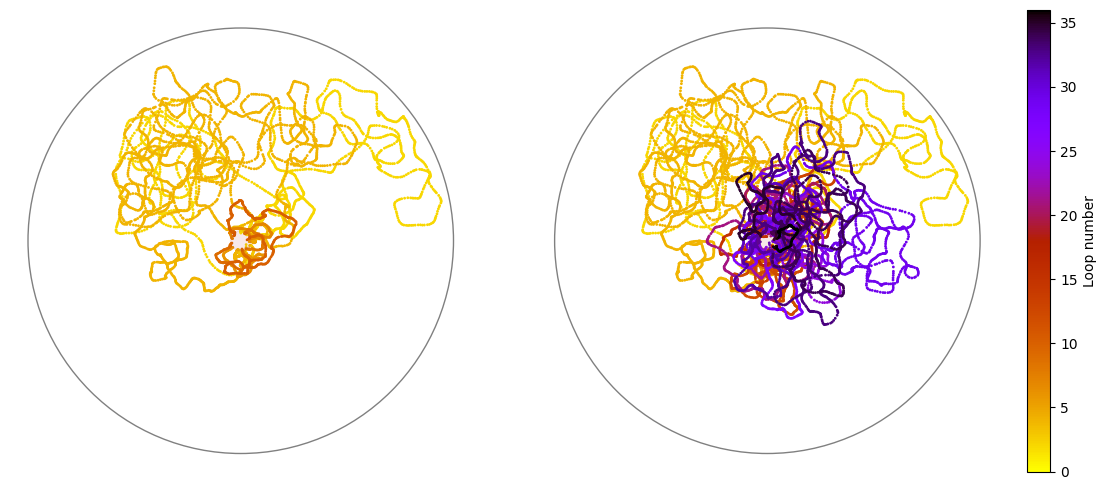

In [17]:
fig, axs = plt.subplots(1,2,figsize=(12,5))
example_genotype = 'Gr43a'
plotDf = loopDf.query(f'genotype=="{example_genotype}" & flyid=="{flyID}"')

n = plotDf.loopN.unique()[-1]
N = 10
axs[0].scatter(plotDf.query('loopN <= {}'.format(N)).body_x.values, plotDf.query('loopN <= {}'.format(N)).body_y.values,s=1,
               c=plotDf.query('loopN <= {}'.format(N)).loopN.values,cmap=loopcmap, vmin=0, vmax=n) 
plotArenaAndFood(axs[0], foodRad=plotDf.food_r.values[0], arenaRad=plotDf.arenaRad.values[0],foodCol='firebrick')

cb = axs[1].scatter(plotDf.body_x.values,plotDf.body_y.values,s=1,c=plotDf.loopN.values,cmap=loopcmap,vmin=0, vmax=n) 
plotArenaAndFood(axs[1], foodRad=plotDf.food_r.values[0], arenaRad=plotDf.arenaRad.values[0],foodCol='firebrick')
plt.colorbar(cb,label='Loop number')
fig.tight_layout()
fig.savefig(op.join(plotDir, f'loopIllustration_{flyID}_Fig7A.pdf'), dpi=300)

<a id='fig-7b'></a>
## Fig. 7B, S7B, S7C - Loop Statistics

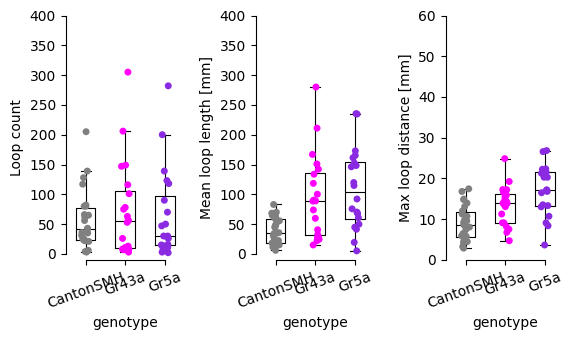

In [19]:
absLoopCount = distDf.groupby(['genotype','flyid'])[['loopCount']].sum().reset_index()
myfigsize=(.65*len(genotypes)*3,3.5)
fig, axs = plt.subplots(1,3,figsize=myfigsize)

sns.stripplot(x='genotype', y='loopCount', hue='genotype',palette=pal,data=absLoopCount,dodge=False, ax=axs[0], order=genotypes)
sns.boxplot(data=absLoopCount, x='genotype', y='loopCount', hue='genotype', dodge=False, legend=False,fill=False, fliersize=0, width=0.5,ax=axs[0], order=genotypes)
plt.setp(axs[0].lines, color='k',linewidth=0.8)
axs[0].set_ylim(-10,400)
axs[0].set_ylabel('Loop count')

meanLoopLen = pd.DataFrame(loopLenStats.groupby(['genotype','flyid']).mean('loop_length')['loop_length']).reset_index()

sns.stripplot(x='genotype', y='loop_length', hue='genotype',palette=pal,data=meanLoopLen,dodge=False,ax=axs[1], order=genotypes)
sns.boxplot(data=meanLoopLen, x='genotype', y='loop_length', hue='genotype', dodge=False, legend=False,fill=False, fliersize=0, width=0.5,ax=axs[1], order=genotypes)
plt.setp(axs[1].lines, color='k',linewidth=0.8)
axs[1].set_ylim(-10,400)
axs[1].set_ylabel('Mean loop length [mm]')

meanLoopLen = pd.DataFrame(loopLenStats.groupby(['genotype','condition', 'flyid']).mean('distance_patch_0')['distance_patch_0']).reset_index()

sns.stripplot(x='genotype', y='distance_patch_0', hue='genotype',palette=pal,data=meanLoopLen,dodge=False,ax=axs[2], order=genotypes)
sns.boxplot(data=meanLoopLen, x='genotype', y='distance_patch_0', hue='genotype', dodge=False, legend=False,fill=False, fliersize=0, width=0.5,ax=axs[2], order=genotypes)
plt.setp(axs[2].lines, color='k',linewidth=0.8)
axs[2].set_ylim(0,60)
axs[2].set_ylabel('Max loop distance [mm]')

for ax in axs:
    ax.set_xticks(range(len(genotypes)))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 20);

sns.despine(trim=True)
fig.tight_layout()
fig.savefig(op.join(plotDir, 'loopStats_genotypeComparison_Fig7B-FigS7B-C.pdf'), dpi=300)

<a id='fig-7c'></a>
## Fig. 7C - Loop Length Distribution

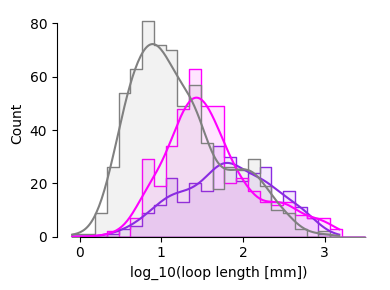

In [20]:
tmp = loopLenStats[['condition','genotype','flyid','loopN','loop_length']]
tmp['log_loop_length'] = np.log10(tmp['loop_length'])

fig, axs = plt.subplots(1,1,figsize=(4,3))
sns.histplot(ax=axs, data=tmp, x='log_loop_length', hue='genotype', bins=25, binrange=(-.1,3.5), element="step", fill=True, alpha=0.1,
             palette=pal,kde=True, legend=False)
axs.set_xlabel('log_10(loop length [mm])')
sns.despine(trim=True)
fig.tight_layout()
fig.savefig(op.join(plotDir, 'loopStats_loopLenDistribution_Fig7C.pdf'), dpi=300)

<a id='fig-7d'></a>
## Fig. 7D - Loop scaling regression analysis

CantonSMH
n=24
                            OLS Regression Results                            
Dep. Variable:               log_dist   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     58.88
Date:                Thu, 29 Jan 2026   Prob (F-statistic):           9.42e-14
Time:                        12:48:33   Log-Likelihood:                -121.73
No. Observations:                 483   AIC:                             247.5
Df Residuals:                     481   BIC:                             255.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5899      0.028     

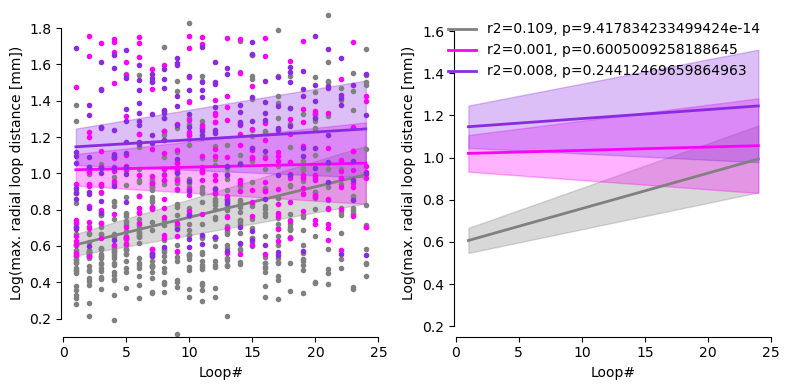

In [20]:
import statsmodels.formula.api as smf
fig, axs = plt.subplots(1,2, figsize=(8,4))    

for g, genotype in enumerate(genotypes):
    print(genotype)
    statsDf = loopLenStats.query(f'genotype == "{genotype}" & loopN < 25')[['flyid','loopN','distance_patch_0']]
    statsDf['log_dist'] = np.log10(statsDf.distance_patch_0)
    cts = statsDf.groupby('flyid').count().reset_index()
    slctflies = list(cts.query('loopN >= 10').flyid.values)
    print(f'n={len(slctflies)}')
    statsDf = statsDf.query(f'flyid in {slctflies}')

    axs[0].plot(statsDf.loopN, statsDf.log_dist,'.',color=pal[genotype])
    model = smf.ols(formula='log_dist~loopN', data=statsDf).fit()
    p = model.params
    x = np.arange(1, 25)   
    civ = model.conf_int(alpha=0.05)
    # plot regression line on the same axes, set x-axis limits
    axs[0].plot(x, p.Intercept + p.loopN*x,linewidth=2, color=pal[genotype], label=f'r2={round(model.rsquared,3)}, p={model.pvalues.loopN}')
    axs[0].fill_between(x, civ[0].Intercept + civ[0].loopN*x, civ[1].Intercept + civ[1].loopN*x,alpha=0.3,color=pal[genotype], label='')

    axs[1].plot(x, p.Intercept + p.loopN*x,linewidth=2, color=pal[genotype], label=f'r2={round(model.rsquared,3)}, p={model.pvalues.loopN}')
    axs[1].fill_between(x, civ[0].Intercept + civ[0].loopN*x, civ[1].Intercept + civ[1].loopN*x,alpha=0.3,color=pal[genotype], label='')

    print(model.summary())
    print('\n')
    
axs[0].set_ylim(0.1,1.9)
axs[1].set_ylim(0.15,1.7)
axs[1].legend(frameon=False)
for ax in axs:
    ax.set_xlabel('Loop#')
    ax.set_ylabel('Log(max. radial loop distance [mm])')
    sns.despine(trim=True, ax=ax)
fig.tight_layout()
fig.savefig(plotDir+sep+'loopscaling_groupComparison_linearReg_Fig7D.pdf')

## Calculate further stats

In [25]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    loopDistCt = pd.DataFrame(loopdepStats.query('segment == 2').groupby(['condition','flyid','maxDistBin_uneven']).count().to_records())\
                    [['condition','flyid','maxDistBin_uneven','segment']]
    depDistCt = pd.DataFrame(loopdepStats.query('segment == 4').groupby(['condition','flyid','maxDistBin_uneven']).count().to_records())\
                    [['condition','flyid','maxDistBin_uneven','segment']]
    DistCt = (pd.merge(loopDistCt, depDistCt, on=['condition','flyid','maxDistBin_uneven'])).rename(columns={'segment_x':'loopCount','segment_y':'departureCount'})
    DistCt['returnratio'] = DistCt.loopCount.values/(DistCt.loopCount.values+DistCt.departureCount.values)
    
    loopDistCt_farClose = pd.DataFrame(loopdepStats.query('segment == 2').groupby(['condition','flyid','maxDistBin_farClose']).count().to_records())\
                    [['condition','flyid','maxDistBin_farClose','segment']]
    depDistCt_farClose = pd.DataFrame(loopdepStats.query('segment == 4').groupby(['condition','flyid','maxDistBin_farClose']).count().to_records())\
                    [['condition','flyid','maxDistBin_farClose','segment']]
    DistCt_farClose = (pd.merge(loopDistCt_farClose, depDistCt_farClose, on=['condition','flyid','maxDistBin_farClose'])).rename(columns={'segment_x':'loopCount','segment_y':'departureCount'})
    DistCt_farClose['returnratio'] = DistCt_farClose.loopCount.values/(DistCt_farClose.loopCount.values+DistCt_farClose.departureCount.values)
    
    loopFedCt = pd.DataFrame(loopdepStats.query('segment == 2').groupby(['condition','flyid','feedingBin']).count().to_records())\
                    [['condition','flyid','feedingBin','segment']]
    depFedCt = pd.DataFrame(loopdepStats.query('segment == 4').groupby(['condition','flyid','feedingBin']).count().to_records())\
                    [['condition','flyid','feedingBin','segment']]
    FedCt = (pd.merge(loopFedCt, depFedCt, on=['condition','flyid','feedingBin'])).rename(columns={'segment_x':'loopCount','segment_y':'departureCount'})
    FedCt['returnratio'] = FedCt.loopCount.values/(FedCt.loopCount.values+FedCt.departureCount.values)

<a id='fig-7e'></a>
## Fig. 7E - Loop path length as function of maximum distance to food range

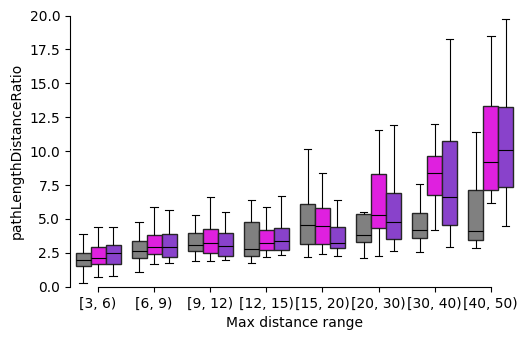

In [26]:
plotDf = loopdepStats.query('segment == 2 & maxDist <50 & maxDist >=3').reset_index()
#plotDf.to_csv(plotDir+sep+'loopLenVsLoopDistancetoLengthRatio_genotypeComparison.csv')
fig, axs = plt.subplots(1,1,figsize = (1.8*len(genotypes),3.5))
sns.boxplot(data=plotDf, x='maxDistBin_uneven', y='pathLengthDistanceRatio', hue='genotype', dodge=True, legend=False,fill=True, palette=pal,fliersize=0, width=0.8,ax=axs)
plt.setp(axs.lines, color='k',linewidth=0.8)
axs.set_xlabel('Max distance range')
axs.set_xlim(0.5,8.5)
axs.set_ylim(0,20)
sns.despine(trim=True)
fig.tight_layout()
fig.savefig(op.join(plotDir, 'loopLenVsLoopDistancetoLengthRatio_genotypeComparison_Fig7E.pdf'), dpi=300)

## Save preprocessed data to file

In [21]:
distDf.to_csv(op.join(plotDir, f'distDf_{groupName}.csv'))
distDf_farClose.to_csv(op.join(plotDir, f'distDf_farClose_{groupName}.csv'))
loopdepStats.to_csv(op.join(plotDir, f'loopStats_{groupName}.csv'))
loopLenStats.to_csv(op.join(plotDir, f'loopLenStats_{groupName}.csv'))

<a id='fig-7f'></a>
## Fig. 7F - Turn bias

In [50]:
for fly in datDf.fly.unique():
    flyDf = datDf.loc[datDf.fly==fly]
    condition = flyDf.genotype.unique()[0]
    if 'Gr' in condition:
        Nframes = len(flyDf.loc[(flyDf.time <=600)&(flyDf.ethogram==3)])
        count = 0
        if Nframes > 0: ### fly to fix        
            first_valid_visit = flyDf.loc[(flyDf.time > 600)&(flyDf.ethogram==3)].index[0]
            st,en = flyDf.index[0], first_valid_visit-1

            ### fix ethogram
            new_etho = flyDf.loc[st:en].copy().ethogram
            new_etho.loc[new_etho==3] = np.nan
            new_etho.ffill(inplace=True)
            if np.any(new_etho==3):
                print(fly, Nframes)
                print(np.any(new_etho==3))

            ### fix segments
            l,p,s = rle(flyDf.loc[st:en].segment.values)
            new_segm = flyDf.loc[st:en].copy().segment
            #print(np.where(s==1)[0])
            for i in np.where(s==1)[0]:
                #print(s[i-1], s[i], s[i+1])
                #print(p[i-1], p[i], p[i+1])
                if s[i+1] == 4:
                    new_segm.loc[st+p[i-1]:st+p[i+1]+l[i+1]-1] = 5.
                elif s[i+1] == 2 and np.any(s[i+1:]==0):
                    new_segm.loc[st+p[i-1]:st+p[i]+l[i]-1] = 5.
                    new_segm.loc[st+p[i+1]:st+p[i+1]+l[i+1]-1] = 3.
                else:
                    new_segm.loc[st+p[i-1]:en] = 3.
                    
            l,p,s = rle(new_segm)
            if np.any(s==1):
                print('fly:', fly, s)

            datDf.loc[st:en, 'ethogram'] = new_etho
            datDf.loc[st:en, 'segment'] = new_segm    

In [51]:
#### Per-move df
slct_ethoStates = [1,2] #{0: 'border', 1: 'turn', 2: 'run', 3: 'feeding', 4: 'other'}
slct_cond = list(datDf.condition.unique())
print(slct_cond)
#datDf_filt = datDf.query(f'condition in {slct_cond}')
datDf_filt = datDf.query(f'ethogram != {4} & condition in {slct_cond}')

# create per-move segment dataframe consisting only of runs and turns
perMoveSegDF = makePerMoveSegmentDF(datDf_filt, ethoStatsOfInterest=slct_ethoStates).rename(columns={"fly": "flyid"})
perMoveSegDF.etho_state.unique()

['0-125M_40hr', 'Gr43a-40hr', 'Gr5a-40hr']


array([1, 2], dtype=int32)

In [52]:
etho_state = [1]
min_turns = 3
querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state}'
#if groupName == 'groups_wt-opto': querystring = querystring + f' & condition == "{conditions[1]}"'
keep_indices = ['genotype','condition','flyid','after_which_visit']
means = perMoveSegDF.query(querystring).groupby(keep_indices)['ifCW'].mean().reset_index()
counts = perMoveSegDF.query(querystring).groupby(keep_indices)['ifCW'].count().reset_index()
perMoveSegDF_filt = pd.merge(means,counts,on=keep_indices)
perMoveSegDF_filt = perMoveSegDF_filt.rename(columns={"ifCW_x": "ifCW", "ifCW_y": "turnCount"}).query(f'turnCount >= {min_turns}')

plotdf = perMoveSegDF_filt.copy()
plotdf['abs_ifCW'] = np.array(2.*np.abs(plotdf.ifCW.values -0.5))
plotdf = plotdf.groupby(keep_indices)['abs_ifCW'].mean().reset_index()

gen = plotdf.genotype.values
conds = plotdf.condition.values
plotdf['label'] = [f'{gen[t]}\n{conds[t]}' for t in range(len(gen))]
#plotdf = plotdf.query(f'condition in {conditions[:2]}')

mapped = np.where(plotdf.after_which_visit.values==0, "before", "after")
plotdf['food'] = mapped
plotdf = plotdf.groupby(['genotype','label','flyid','food'])['abs_ifCW'].mean().reset_index()

,groupA,groupB,test,p-value
0,"CantonSMH, before","CantonSMH, after",scipy.stats.ranksums,3.688129e-08
1,"Gr43a, before","Gr43a, after",scipy.stats.ranksums,1.928121e-06
2,"Gr5a, before","Gr5a, after",scipy.stats.ranksums,2.044367e-03


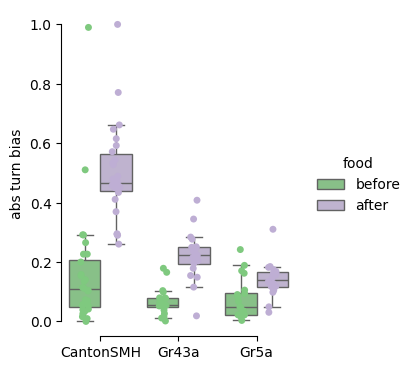

In [53]:
panel_name = 'Fig7F'
colors = {'CantonSMH\n40hr': '#808080', 'Gr43a\n40hr': '#FC0CFF', 'Gr5a\n40hr': '#884AFF'}
"""
STATS
"""
stats_df = {'groupA': [], 'groupB': [], 'test': [], 'p-value': []}
#print('Comparison before vs after food ===')
for each in plotdf['genotype'].unique():
    A, B = plotdf.loc[(plotdf.food == 'before')&(plotdf.genotype == each)].abs_ifCW.values, plotdf.loc[(plotdf.food == 'after')&(plotdf.genotype == each)].abs_ifCW.values
    _, pval = stats.ranksums(A,B)
    stats_df['groupA'].append(f'{each}, before')
    stats_df['groupB'].append(f'{each}, after')
    stats_df['test'].append('scipy.stats.ranksums')
    stats_df['p-value'].append(pval)
    
stats_df = pd.DataFrame(stats_df)
display(stats_df)
### save source data and stats
plotdf.to_csv(op.join(plotDir, f'sourcedata_{panel_name}.csv'), index=False)
stats_df.to_csv(op.join(plotDir, f'stats_{panel_name}.csv'), index=False)

genotypes = list(plotdf.genotype.unique())
g = sns.catplot(
    data=plotdf, x="genotype", y="abs_ifCW", hue="food",
    kind="box", dodge=True, fliersize=0, aspect=.8, height=4, palette='Accent'
)
g.map_dataframe(sns.stripplot, x="genotype", y="abs_ifCW", hue="food", dodge=True, palette='Accent')
g.set_axis_labels("", 'abs turn bias')
g.despine(trim=True)
plt.show()
g.savefig(op.join(plotDir, f'plot_{panel_name}.pdf'),dpi=300)

<a id='fig-7g'></a>
## Fig. 7G-I - Locomotion as function of time since last food

In [48]:
visitTH = '>=1' #  This is an upper bound: ==0 --> before finding food spot, >=1 --> after finding food.
if visitTH == '==0': postfix = 'beforefood'
else: postfix = 'afterfood'

etho_state = [1]
gen = per_move_postfood_df.genotype.values
conds = per_move_postfood_df.condition.values
per_move_postfood_df['cond-gen'] = [f'{gen[t]}\n{conds[t]}' for t in range(len(gen))]

#itterate through genotypes to fetch correct data
per_move_postfood_df_filt = pd.DataFrame()
for g, genotype in enumerate(genotypes):
    querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state}  & genotype == "{genotype}"'
    querystring = querystring + f' & after_which_visit {visitTH}'
    per_move_postfood_df_filt = pd.concat([per_move_postfood_df_filt,per_move_postfood_df.query(querystring)])

timebins = np.round(np.linspace(-0.5,3.5,9),2)
with np.errstate(divide='ignore'):
    per_move_postfood_df_filt['dist_since_visit_log'] = np.log10(per_move_postfood_df_filt.dist_since_visit.values)
    per_move_postfood_df_filt['dist_since_visit_log10_bin'] = pd.cut(per_move_postfood_df_filt.dist_since_visit_log.values, bins=timebins, precision=1, labels=False)

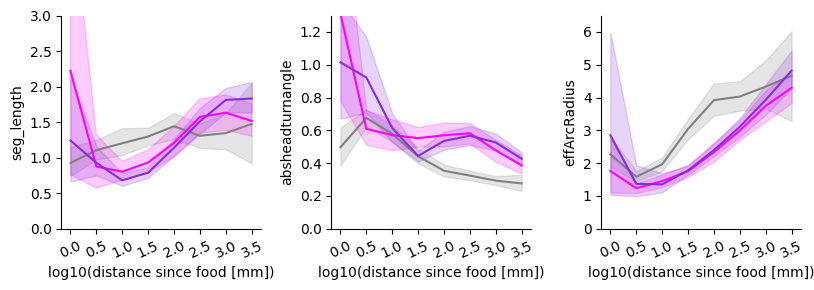

In [49]:
if postfix == 'afterfood':  #only makes sense after food
    pltdf = per_move_postfood_df_filt.groupby(['genotype','condition','cond-gen','flyid','dist_since_visit_log10_bin'],observed=False)[['seg_length','effArcRadius','absheadturnangle']].median().reset_index()
    
    qoi = ['seg_length','absheadturnangle','effArcRadius']
    ylims = [(0,3),(0,1.3),(0,6.5)]# #[(0,2.5),(0,1),(0,6.5)]# [(0.4,3),(0.2,1.5),(0,6.5)]#[(0.4,2.5),(0,6.5),(0.1,1.1)]

    fig, axs = plt.subplots(1,len(qoi),figsize=(2.75*len(qoi),3))

    for i, q in enumerate(qoi):
        ax = sns.lineplot(data = pltdf, x='dist_since_visit_log10_bin', y=q, hue='genotype', palette=pal, ax=axs[i])
        ax.set_xticks(np.arange(len(timebins)-1));
        ax.set_xticklabels(timebins[1:],rotation = 25);
        #if i!=2: 
        ax.legend('', frameon=False)
        myAxisTheme(ax)
        ax.set_ylim(ylims[i])
        ax.set_xlabel('log10(distance since food [mm])')
    fig.tight_layout()
    fig.savefig(op.join(plotDir, 'distsincefood_locomotion_Fig7G-I.pdf'), dpi=300)

<a id='fig-s7a'></a>
## Fig. S7A - Fraction of time spent in different segments

In [54]:
trialLen = 45.
plotDf = datDf[['genotype', 'flyid', 'segment','dt']].reset_index(drop=True)
plotDf = plotDf.assign(segname = lambda dataframe: dataframe['segment'].map(lambda segment: seg_label[segment]) )
timespentSeg = plotDf.groupby(['genotype','flyid', 'segname']).sum()
timespentSeg['minutesTime'] = timespentSeg.dt.values/60.
timespentSeg['normTrialTime'] = timespentSeg.minutesTime.values/trialLen

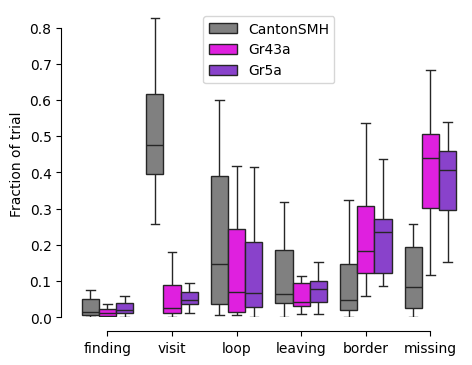

In [55]:
fig, axs = plt.subplots(1,1,figsize=(5,4))

sns.boxplot(x="segname", y="normTrialTime", data=timespentSeg.query(f'genotype in {genotypes}').reset_index(),  hue='genotype',palette=pal,ax=axs, 
            order=['finding','visit','loop','leaving','border','missing'], showfliers=False)
myAxisTheme(axs)
axs.legend()
axs.set_ylim(0,.85)
axs.set_xlabel('')
axs.set_ylabel('Fraction of trial')
sns.despine(offset=10, trim=True)
fig.savefig(op.join(plotDir, 'timeSpentOnSegment_FigS7A.pdf'),dpi =300)

<a id='fig-s7d'></a>
## Fig. S7D - Individual-fly regression slopes

In [62]:
plotdata = loopLenStats.copy()
plotdata = plotdata.query('condition!="0-125M_40hr"')
plotdata['combined_x'] = plotdata.normFed * plotdata.loopN/np.amax(plotdata.loopN)
plotdata['log_dist'] = np.log10(plotdata.distance_patch_0)
#plotdata.query('condition == "Gr5a-40hr" and flyid == "fly17"')
print(plotdata.condition.unique())

['Gr43a-40hr' 'Gr5a-40hr']


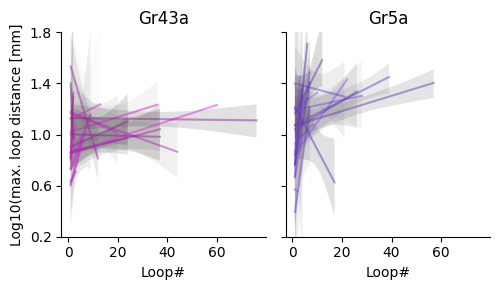

In [66]:
#Gr43a #E12FE1 : deeppink
#Gr5a  #8E53FF : violet
pal1 = sns.dark_palette("#E12FE1", n_colors=40, reverse=True, as_cmap=False)
pal2 = sns.dark_palette("#8E53FF", n_colors=40, reverse=True, as_cmap=False)

g = sns.lmplot(data=plotdata, x="loopN", y="log_dist", col="condition", hue='flyid', palette='Grays', 
               line_kws=dict(alpha=0.5, lw=1.5), x_bins=np.arange(1, 26, 3), col_order=plotdata.condition.unique(),
               ci=95, n_boot=10000, markers="x", scatter=False, legend=False, fit_reg=True, truncate=True, height=3, aspect=0.85)
g.figure.subplots_adjust(wspace=0)
for (cond, ax), color in zip(g.axes_dict.items(), ['Blues', 'Reds']):
    if '43a' in cond:
        ax.set_ylabel('Log10(max. loop distance [mm]')
    ax.set(xlabel='Loop#', ylim=[0.2,1.8], yticks=np.arange(0.2,1.9,0.4), xticks=[0,20,40,60])
    ax.set_title(f"{cond.split('-')[0]}")
    for i, el in enumerate(ax.get_lines()):
        if color == 'Blues':
            el.set_color(pal1[i])
        else:
            el.set_color(pal2[i])
    ##ax.set_palette(color)
plt.tight_layout()
plt.savefig(op.join(plotDir, f'slopes_both_ylog_ci_{groupName}_figS7D.pdf'), dpi=300)

<a id='fig-s7e'></a>
## Fig. S7E - Boxplot of regression slope values

In [71]:
import statsmodels.formula.api as smf
from scipy.stats import wilcoxon, ranksums, normaltest, ttest_ind, bws_test, brunnermunzel

df_slopes = loopLenStats.copy()
df_slopes['log_dist'] = np.log10(df_slopes.distance_patch_0)
print(df_slopes.condition.unique())
df_slopes['fly'] = df_slopes['condition'].str.split('-', expand=True)[0]+'_' + df_slopes['flyid'] 
param_df = {'fly':[], 'condition': [], 'slope':[], 'intercept':[], 'total_loops': []}
for fly in df_slopes.fly.unique():
    fly_df = df_slopes.query(f'fly == "{fly}"').query('loopN < 25')
    model = smf.ols("log_dist ~ loopN", data=fly_df).fit()
    slope = model.params['loopN'] 
    intercept = model.params['Intercept'] ### intercept
    param_df['fly'].append(fly)
    param_df['total_loops'].append(np.amax(fly_df.loopN))
    if '43a' in fly_df.condition.unique()[0]:
        param_df['condition'].append('Gr43a')
    elif '5a' in fly_df.condition.unique()[0]:
        param_df['condition'].append('Gr5a')
    else:
        param_df['condition'].append('CantonS')
    param_df['slope'].append(slope)
    param_df['intercept'].append(intercept)
param_df= pd.DataFrame(param_df)
#param_df['condition'] = '24 h'
display(param_df.sort_values(by='total_loops'))
param_df = param_df.query('total_loops >= 10')

['0-125M_40hr' 'Gr43a-40hr' 'Gr5a-40hr']


,fly,condition,slope,intercept,total_loops
60,Gr5a_fly15,Gr5a,0.479144,0.479144,1
32,Gr43a_fly07,Gr43a,0.503358,0.291715,2
40,Gr43a_fly15,Gr43a,0.516851,0.293513,2
45,Gr43a_fly20,Gr43a,-0.425652,1.825630,2
47,Gr5a_fly02,Gr5a,-0.016354,0.586350,2
...,...,...,...,...,...
25,0_fly29,CantonS,0.033838,0.410515,24
24,0_fly28,CantonS,0.002206,0.640700,24
20,0_fly22,CantonS,0.021728,0.512799,24
8,0_fly10,CantonS,0.038320,0.316622,24


0.006922651100971632
0.11491486452557413
0.5184240444618575
3
Kruskal: 0.019253744073757233


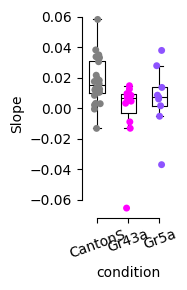

In [77]:
#absLoopCount = pd.DataFrame(distDfGroups.groupby(['condition', 'flyid']).sum('loopCount')['loopCount']).reset_index()
#if savename == "wt-opto": absLoopCount = absLoopCount.query('condition in ["0-125M_24hr", "0-125M_40hr", "optoGr5a_40hr", "optoGr43a_40hr"]')
conds = list(param_df.condition.unique())
new_cond_color = {
    'CantonS': 'gray',
    'Gr43a': 'magenta',
    'Gr5a': '#8E53FF', ###'violet',
}

myfigsize=(.65*len(conds)*1,3) ## 1 a
fig, ax = plt.subplots(figsize=myfigsize)

sns.stripplot(data=param_df, x='condition', y='slope', hue='condition',palette=new_cond_color,dodge=False, ax=ax, order=conds)
sns.boxplot(data=param_df, x='condition', y='slope', hue='condition', dodge=False, legend=False,fill=False, fliersize=0, width=0.5,ax=ax, order=conds)

### p-value comp
from scipy.stats import ranksums, kruskal
from itertools import combinations

def pairwise(iterable):
    """Yield all unique 2-item pairs, preserving the original order."""
    yield from combinations(iterable, 2)

groups = [param_df[param_df.condition==cond].slope for cond in param_df.condition.unique()]
for a,b in pairwise(groups):
    _,pval = ranksums(a,b)
    print(pval)


print(len(groups))
print('Kruskal:', kruskal(*groups)[1])


plt.setp(ax.lines, color='k',linewidth=0.8)
ax.set_xticks(range(len(conds))) 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 20);
#ax.set_ylim(-10,400)
ax.set_ylabel('Slope')

sns.despine(trim=True)
fig.tight_layout()
plt.show()
fig.savefig(op.join(plotDir, f'slopes_per_fly_{groupName}.pdf'), dpi=300)

<a id='fig-s7f'></a>
## Fig. S7F - Boxplot of regression intercept values

3.757921101244181e-05
2.1920504286481964e-05
0.18366985885429898
3
Kruskal: 9.261788298539426e-07


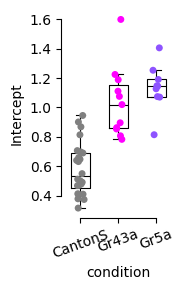

In [76]:
#absLoopCount = pd.DataFrame(distDfGroups.groupby(['condition', 'flyid']).sum('loopCount')['loopCount']).reset_index()
#if savename == "wt-opto": absLoopCount = absLoopCount.query('condition in ["0-125M_24hr", "0-125M_40hr", "optoGr5a_40hr", "optoGr43a_40hr"]')
conds = list(param_df.condition.unique())
new_cond_color = {
    'CantonS': 'gray',
    'Gr43a': 'magenta',
    'Gr5a': '#8E53FF', ###'violet',
}

myfigsize=(.65*len(conds)*1,3) ## 1 a
fig, ax = plt.subplots(figsize=myfigsize)

sns.stripplot(data=param_df, x='condition', y='intercept', hue='condition',palette=new_cond_color,dodge=False, ax=ax, order=conds)
sns.boxplot(data=param_df, x='condition', y='intercept', hue='condition', dodge=False, legend=False,fill=False, fliersize=0, width=0.5,ax=ax, order=conds)

### p-value comp
from scipy.stats import ranksums, kruskal
from itertools import combinations

def pairwise(iterable):
    """Yield all unique 2-item pairs, preserving the original order."""
    yield from combinations(iterable, 2)

groups = [param_df[param_df.condition==cond].intercept for cond in param_df.condition.unique()]
for a,b in pairwise(groups):
    _,pval = ranksums(a,b)
    print(pval)


print(len(groups))
print('Kruskal:', kruskal(*groups)[1])


plt.setp(ax.lines, color='k',linewidth=0.8)
ax.set_xticks(range(len(conds))) 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 20);
#ax.set_ylim(-10,400)
ax.set_ylabel('Intercept')

sns.despine(trim=True)
fig.tight_layout()
plt.show()
fig.savefig(op.join(plotDir, f'intercepts_per_fly_{groupName}.pdf'), dpi=300)

<a id='fig-s7g'></a>
## Fig. S7G - Run length distribution

In [38]:
# extract data of interest
criteria = {}
etho_state = [2] # 2: runs
qOI = 'seg_length'
iflogq = True
distOI = 'skewnorm'

dffitRunLenAll = pd.DataFrame()
for visitTH in ['==0','>=1']: #  This is an upper bound: ==0 --> before finding food spot, >=1 --> after finding food.
    
    if visitTH == '==0': postfix = 'beforefood'
    else: postfix = 'afterfood'
    
    fittedparamsall = np.nan*np.ones((3,len(genotypes)))
    for c, genotype in enumerate(genotypes):
        querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state}& genotype == "{genotype}"'
        querystring = querystring + f' & after_which_visit {visitTH}'
        perMoveSegDF_filt = perMoveSegDF.query(querystring)
        if len(perMoveSegDF_filt) == 0: continue
        datavec, fittedparams, best_fit_line = getModelDistributionParams(perMoveSegDF_filt, qOI, criteria,fitdist = distOI,iflog = iflogq)
        fittedparamsall[:,c] = fittedparams
    dffitRunLen = pd.DataFrame(data=fittedparamsall.T, columns = ['a','loc','scale'])
    dffitRunLen['genotype'] = genotypes
    dffitRunLen['condition'] = conditions[0]
    dffitRunLen['food'] = postfix[:-4]
    dffitRunLen = dffitRunLen.reset_index(drop=True).dropna()
    #dffitRunLen.to_csv(plotDir+sep+'runLengthDistribution_'+postfix+'.csv', index=False)  

    dffitRunLenAll = pd.concat([dffitRunLenAll,dffitRunLen])
    print(postfix)
    print(dffitRunLen)

beforefood
          a       loc     scale   genotype    condition    food
0 -2.394220  0.873348  0.738654  CantonSMH  0-125M_40hr  before
1 -1.615682  0.892661  0.763798      Gr43a  0-125M_40hr  before
2 -1.489779  0.870107  0.666614       Gr5a  0-125M_40hr  before
afterfood
          a       loc     scale   genotype    condition   food
0 -1.816468  0.735049  0.689546  CantonSMH  0-125M_40hr  after
1 -0.767756  0.503812  0.604932      Gr43a  0-125M_40hr  after
2 -1.592724  0.741064  0.688136       Gr5a  0-125M_40hr  after


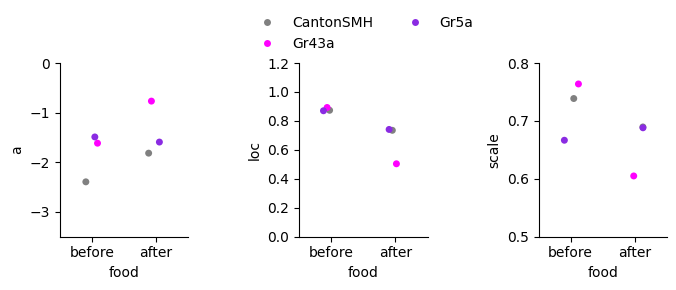

In [42]:
fig, axs = plt.subplots(1,3, figsize=(7,3))

vlims = [[-3.5,0],[0,1.2],[.5,.8]]
for p, param in enumerate(['a','loc','scale']):
    sns.stripplot(data=dffitRunLenAll, x='food', y=param, hue='genotype', palette=pal, ax=axs[p], jitter=0.15)
    sns.despine()
    if p!=1: axs[p].legend([],[], frameon=False)
    else: sns.move_legend(axs[p], "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
    axs[p].set_ylim(vlims[p])
fig.tight_layout()
fig.savefig(op.join(plotDir, f'runLengthDistributionFitParams_{postfix}_FigS7G.pdf'), dpi=300)

<a id='fig-s7h'></a>
## Fig. S7H - Turn size distribution

In [43]:
# extract data of interest
etho_state = [1] # 1: turns
qOI = 'absheadturnangle'
iflogq = False
distOI = 'lognorm'
xlims = (0,3.5) #0,3

dffitTurnAngAll = pd.DataFrame()
for visitTH in ['==0','>=1']: #  This is an upper bound: ==0 --> before finding food spot, >=1 --> after finding food.
    
    if visitTH == '==0': postfix = 'beforefood'
    else: postfix = 'afterfood'
    
    fittedparamsall = np.nan*np.ones((3,len(genotypes)))
    for c, genotype in enumerate(genotypes):
        querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} &  genotype == "{genotype}"'
        querystring = querystring + f' & after_which_visit {visitTH}'
        perMoveSegDF_filt = perMoveSegDF.query(querystring)
        if len(perMoveSegDF_filt) == 0: continue
        datavec, fittedparams, best_fit_line = getModelDistributionParams(perMoveSegDF_filt, qOI, criteria,fitdist = distOI,iflog = iflogq)
        fittedparamsall[:,c] = fittedparams
    dffitTurnAng = pd.DataFrame(data=fittedparamsall.T, columns = ['s','loc','scale'])
    dffitTurnAng['condition'] = conditions[0]
    dffitTurnAng['genotype'] = genotypes
    dffitTurnAng['food'] = postfix[:-4]
    dffitTurnAng = dffitTurnAng.reset_index(drop=True).dropna()
    #dffitTurnAng.to_csv(plotDir+sep+'turnAngleDistribution_'+postfix+'.csv', index=False)  
    dffitTurnAngAll = pd.concat([dffitTurnAngAll,dffitTurnAng])
    print(postfix)
    print(dffitTurnAng)

beforefood
          s       loc     scale    condition   genotype    food
0  0.763790 -0.048788  0.354810  0-125M_40hr  CantonSMH  before
1  1.116826 -0.015209  0.320655  0-125M_40hr      Gr43a  before
2  1.032730 -0.026284  0.412419  0-125M_40hr       Gr5a  before
afterfood
          s       loc     scale    condition   genotype   food
0  0.897445 -0.031354  0.386104  0-125M_40hr  CantonSMH  after
1  1.009828 -0.035172  0.454219  0-125M_40hr      Gr43a  after
2  1.002040 -0.036913  0.469310  0-125M_40hr       Gr5a  after


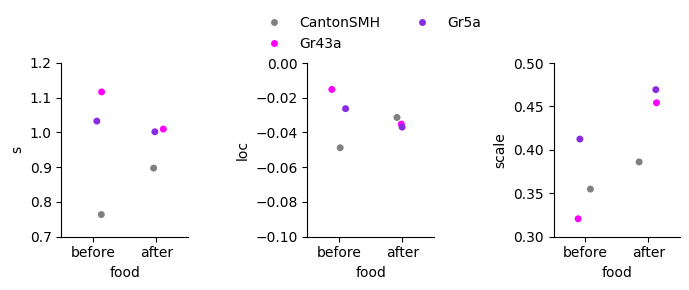

In [44]:
fig, axs = plt.subplots(1,3, figsize=(7,3))

vlims = [[.7,1.2],[-.1,0],[.3,.5]]
for p, param in enumerate(['s','loc','scale']):
    sns.stripplot(data=dffitTurnAngAll, x='food', y=param, hue='genotype', palette=pal, ax=axs[p], jitter=0.15)
    sns.despine()
    if p!=1: axs[p].legend([],[], frameon=False)
    else: sns.move_legend(axs[p], "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
    axs[p].set_ylim(vlims[p])
fig.tight_layout()
fig.savefig(op.join(plotDir, f'turnAngleDistributionFitParams_{postfix}_FigS7H.pdf'), dpi=300)

<a id='fig-s7i'></a>
## Fig. S7I - Turn radius distribution

In [45]:
# extract data of interest
etho_state = [1] # 1: turns
qOI = 'effArcRadius'
iflogq = True
distOI = 'genlogistic'
xlims = (-1.5, 2.5)

dffitTurnRadAll = pd.DataFrame()
for visitTH in ['==0','>=1']: #  This is an upper bound: ==0 --> before finding food spot, >=1 --> after finding food.
    if visitTH == '==0': postfix = 'beforefood'
    else: postfix = 'afterfood'
    
    fittedparamsall = np.nan*np.ones((3,len(genotypes)))
    for c, genotype in enumerate(genotypes):
        querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & genotype == "{genotype}"'
        querystring = querystring + f' & after_which_visit {visitTH}'
        perMoveSegDF_filt = perMoveSegDF.query(querystring)
        if len(perMoveSegDF_filt) == 0: continue
        datavec, fittedparams, best_fit_line = getModelDistributionParams(perMoveSegDF_filt, qOI, criteria,fitdist = distOI,iflog = iflogq)
        fittedparamsall[:,c] = fittedparams
    dffitTurnRad = pd.DataFrame(data=fittedparamsall.T, columns = ['c','loc','scale'])
    dffitTurnRad['condition'] = conditions[0]
    dffitTurnRad['genotype'] = genotypes
    dffitTurnRad['food'] = postfix[:-4]
    dffitTurnRad = dffitTurnRad.reset_index(drop=True).dropna()
    
    #dffitTurnRad.to_csv(plotDir+sep+'turnRadiusDistribution_'+postfix+'.csv', index=False)  
    dffitTurnRadAll = pd.concat([dffitTurnRadAll,dffitTurnRad])
    print(postfix)
    print(dffitTurnRad)

beforefood
          c       loc     scale    condition   genotype    food
0  2.049832  0.358145  0.300934  0-125M_40hr  CantonSMH  before
1  0.830244  0.725822  0.259340  0-125M_40hr      Gr43a  before
2  0.708159  0.858485  0.220246  0-125M_40hr       Gr5a  before
afterfood
          c       loc     scale    condition   genotype   food
0  2.587022  0.168925  0.305582  0-125M_40hr  CantonSMH  after
1  1.111092  0.459074  0.281100  0-125M_40hr      Gr43a  after
2  1.047393  0.517914  0.269358  0-125M_40hr       Gr5a  after


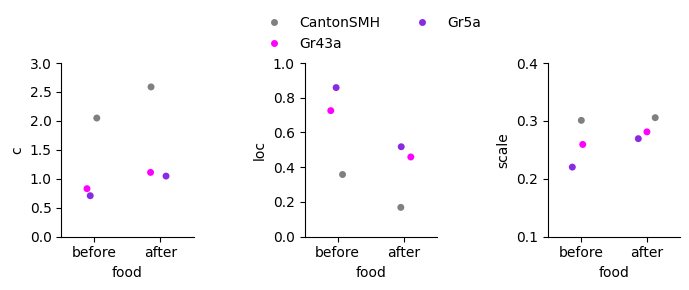

In [46]:
fig, axs = plt.subplots(1,3, figsize=(7,3))

vlims = [[0,3],[0,1],[.1,.4]]
for p, param in enumerate(['c','loc','scale']):
    sns.stripplot(data=dffitTurnRadAll, x='food', y=param, hue='genotype', palette=pal, ax=axs[p], jitter=0.15)
    sns.despine()
    if p!=1: axs[p].legend([],[], frameon=False)
    else: sns.move_legend(axs[p], "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
    axs[p].set_ylim(vlims[p])
fig.tight_layout()
fig.savefig(op.join(plotDir, f'turnRadiusDistributionFitParams_{postfix}_FigS7I.pdf'), dpi=300)

<a id='fig-S7j'></a>
## Fig. S7J - Return ratio as a function of maximum distance to food range

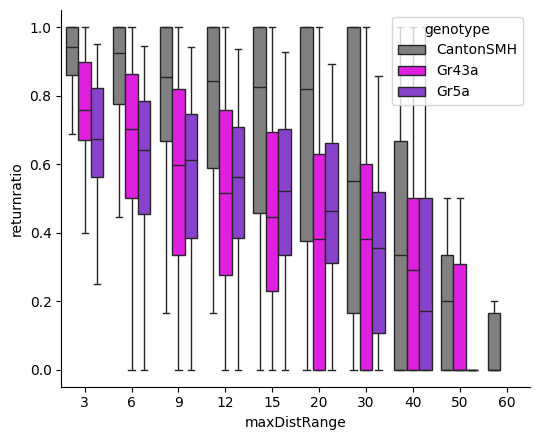

In [18]:
fig, axs = plt.subplots(1,1,figsize=(1+1.5*len(genotypes),4.5))
sns.boxplot(x='maxDistRange', y='returnratio', hue='genotype', data=distDf, showfliers = False, ax=axs, palette=pal, hue_order=genotypes)
myAxisTheme(axs)
fig.tight_layout()
fig.savefig(op.join(plotDir, 'loopAndDepartureStatsVsCumDist_simpleGroupComparison_FigS7J.pdf'), dpi=300)

<a id='dataS1-fig-8'></a>
## Data S1 Fig. 8 - Nutritive and taste cues contribute to eliciting and sustaining search

### Load nutrient dataset

In [6]:
### loading per-frame data
groupName = 'nutrient'
groups = {
    'nutrient':['CR_perframe_sorbitol_single_dark_5ul_alldays',
                 'CR_perframe_sucralose_single_dark_5ul_alldays',
                 'CR_perframe_sucrose_single_dark_5ul_alldays']
    }
plotDir = op.join('plt', groupName)
os.makedirs(plotDir, exist_ok=True)

files = groups[groupName]
datDf, metadata = getDataPerGroup_new(rootDir, files) 
conditions = list(datDf.condition.unique())
genotypes = list(datDf.genotype.unique())
flyids = list(datDf.flyid.unique())

for cond in conditions:
    n=len(list(set(datDf.query(f'condition=="{cond}"').fly.values)))
    print(f'{cond}, n={n}')

display(datDf.head())
display(datDf.shape)

### per-fly data
per_fly_df = get_fly_df(datDf, metadata)

  0%|          | 0/3 [00:00<?, ?it/s]

sorbitol, n=14
sucralose, n=14
sucrose, n=14


,fly,condition,genotype,frame,dt,time,body_x,body_y,head_x,head_y,...,arenaRad,food_x,food_y,food_r,distance_patch_0,flyid,is_feeding,fed,cff,isnan
0,cam01_2023-03-29T14_45_10_head_roi0,sorbitol,CantonS,2042,0.033434,0.033434,-34.730230,73.874617,-35.859439,72.857015,...,85.637256,0.0,-0.0,1.5,81.631170,fly01,0,0.0,0.0,False
1,cam01_2023-03-29T14_45_10_head_roi0,sorbitol,CantonS,2043,0.033203,0.066637,-34.137755,74.176913,-35.265944,73.153699,...,85.637256,0.0,-0.0,1.5,81.655378,fly01,0,0.0,0.0,False
2,cam01_2023-03-29T14_45_10_head_roi0,sorbitol,CantonS,2044,0.033318,0.099955,-33.356888,74.618622,-34.625383,73.747577,...,85.637256,0.0,-0.0,1.5,81.735065,fly01,0,0.0,0.0,False
3,cam01_2023-03-29T14_45_10_head_roi0,sorbitol,CantonS,2045,0.033331,0.133286,-32.501020,74.950765,-33.839923,74.254719,...,85.637256,0.0,-0.0,1.5,81.694146,fly01,0,0.0,0.0,False
4,cam01_2023-03-29T14_45_10_head_roi0,sorbitol,CantonS,2046,0.033293,0.166579,-31.754209,75.051786,-33.111097,74.391327,...,85.637256,0.0,-0.0,1.5,81.492947,fly01,0,0.0,0.0,False


(4540200, 34)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

### Return ratio analysis

In [20]:
numFeedBins = 10
myDistBins = [0,3,6,9,12,15,20,30,40,50,60]
myDistBins_even = list(np.arange(0,61,4))
myDistBins_farClose = [0,20,60]
loopBins = list(np.arange(1,52,4))
loopBinsShort = list(np.arange(1,32,3))
cffBins = np.linspace(-0.1,1,12)

loopdepStats = pd.DataFrame()
pbar = tqdm(conditions)
for condition in pbar:
    pbar.set_description(f"Processing {condition}")
    loopdepStats_tmp = makeLoopDepartureStatsDf(datDf.query(f'condition=="{condition}"'))
    loopdepStats_tmp['condition'] = condition
    loopdepStats = pd.concat([loopdepStats,loopdepStats_tmp])

loopdepStats['feedingBin'] = pd.cut(loopdepStats["normFed"],numFeedBins, precision=0,right=False)
loopdepStats['maxDistBin'] = pd.cut(loopdepStats["maxDist"],bins=myDistBins_even, precision=1,right=False)
loopdepStats['maxDistBin_uneven'] = pd.cut(loopdepStats["maxDist"],bins=myDistBins, precision=1,right=False)
loopdepStats['maxDistBin_farClose'] = pd.cut(loopdepStats["maxDist"],bins=myDistBins_farClose, precision=1,right=False)
loopdepStats.head()

  0%|          | 0/3 [00:00<?, ?it/s]

,condition,fly,flyid,segment,ethogram,distance_patch_0,displacement,dt,is_feeding,fed,...,changeSeg,segID,cumpathlength,maxDist,pathLength,pathLengthDistanceRatio,feedingBin,maxDistBin,maxDistBin_uneven,maxDistBin_farClose
0,sorbitol,cam01_2023-03-30T15_43_14_head_roi0,fly02,2.0,4.0,2.906091,0.054598,0.035034,0,1.864261,...,1,1,0.054598,3.649207,5.063103,1.387453,"[0.0, 0.1)","[0, 4)","[3, 6)","[0, 20)"
1,sorbitol,cam01_2023-03-30T15_43_14_head_roi0,fly02,2.0,1.0,2.838594,0.091720,0.032883,0,2.297721,...,1,2,0.091720,3.206804,2.143088,0.668294,"[0.0, 0.1)","[0, 4)","[3, 6)","[0, 20)"
2,sorbitol,cam01_2023-03-30T15_43_14_head_roi0,fly02,2.0,1.0,2.570928,0.041232,0.034867,0,11.526308,...,1,3,0.041232,6.721065,20.765096,3.089554,"[0.0, 0.1)","[4, 8)","[6, 9)","[0, 20)"
3,sorbitol,cam01_2023-03-30T15_43_14_head_roi0,fly02,2.0,2.0,2.783349,0.176570,0.033357,0,12.084734,...,1,4,0.176570,9.783317,26.709542,2.730111,"[0.0, 0.1)","[8, 12)","[9, 12)","[0, 20)"
4,sorbitol,cam01_2023-03-30T15_43_14_head_roi0,fly02,2.0,2.0,2.615929,0.168575,0.033229,0,12.151358,...,1,5,0.168575,3.378901,14.370159,4.252910,"[0.0, 0.1)","[0, 4)","[3, 6)","[0, 20)"


In [22]:
distDf = pd.DataFrame(columns = ['condition','flyid','maxDistRange','loopCount','returnratio'])
pbar = tqdm(conditions)
for condition in pbar:
    pbar.set_description(f"Processing {condition}")
    conddf = loopdepStats.query(f'condition == "{condition}"')
    flies = list(conddf.flyid.unique())
    for fly in flies:
        for r in myDistBins[1:]: #[1:]
            flydf = conddf.query(f'segment == 2 & maxDist >= {r} & flyid =="{fly}"')
            #print(f'segment == 2 & maxDist >= {r} & flyid =="{fly}"')
            if len(flydf) == 0:
                tmp = pd.DataFrame.from_dict({'condition': [condition], 'flyid':[fly], 'loopCount':[0]})
            else:
                tmp = pd.DataFrame(flydf.groupby(['condition','flyid']).count().to_records())[['condition','flyid','maxDist']].rename(columns={'maxDist':'loopCount'})
            tmp['maxDistRange'] = r
            
            flydf = conddf.query('segment == 4 & maxDist >= {} & flyid =="{}"'.format(r, fly))
            if len(flydf) == 0:
                tmp2 = pd.DataFrame.from_dict({'condition': [condition], 'flyid':[fly], 'nDepartures':[0]})
            else:
                tmp2 = pd.DataFrame(flydf.groupby(['condition','flyid']).count().to_records())[['condition','flyid','maxDist']]
            tmp = (pd.merge(tmp, tmp2, on=['condition','flyid'])).rename(columns={'maxDist':'nDepartures'})
            tmp['allsegs'] = tmp.nDepartures + tmp.loopCount
            tmp = tmp[(tmp.allsegs > 0)]
            tmp['returnratio'] = tmp.loopCount.values/(tmp.loopCount.values + tmp.nDepartures.values)
            distDf = pd.concat([distDf,tmp])

  0%|          | 0/3 [00:00<?, ?it/s]

/var/folders/_1/9_lwjkgx0cxdt5ckms78hbdm0000gr/T/ipykernel_92109/1715985024.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  distDf = pd.concat([distDf,tmp])


<a id='dataS1-fig-8a'></a>
### Data S1 Fig. 8A - Total duration of feeding visits

sorbitol vs sorbitol: pval = 1.000e+00
sorbitol vs sucralose: pval = 4.082e-01
sorbitol vs sucrose: pval = 5.958e-02
sucralose vs sucralose: pval = 1.000e+00
sucralose vs sucrose: pval = 5.066e-03
sucrose vs sucrose: pval = 1.000e+00


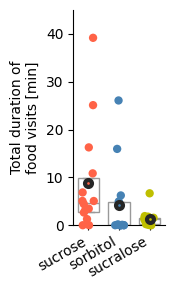

In [82]:
f,ax = plt.subplots(1,figsize=(1.85,3))
per_fly_df['total_visit_min'] = per_fly_df['total_visit']/60. ## in minutes
stripWithBoxplot(ax, per_fly_df.loc[per_fly_df.condition.isin(['sucrose', 'sorbitol', 'sucralose'])], 'condition', 'total_visit_min', cond_color, 'Total duration of\nfood visits [min]', order=['sucrose', 'sorbitol', 'sucralose'])
ax.set_xticklabels(['sucrose', 'sorbitol', 'sucralose'], rotation=30, ha='right')
ax.set_xlabel('')
ax.set_ylim([0,45])
sns.despine(ax=ax, trim=False, bottom=False)
f.tight_layout()
f.savefig(op.join(plotDir,f'total_visit_{groupName}_dataS1_fig8A.pdf'), dpi=300)

<a id='dataS1-fig-8b'></a>
### Data S1 Fig. 8B - Scatterplot of mean duration of food visits as a function of number of visits

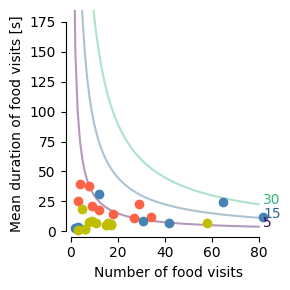

In [87]:
cmap = plt.get_cmap('viridis')
f,ax = plt.subplots(1,figsize=(2*1.5,3))

for cond in ['sucrose', 'sorbitol', 'sucralose']:
    x,y = per_fly_df.loc[per_fly_df.condition==cond,'number_visit'].values, per_fly_df.loc[per_fly_df.condition==cond,'mean_visit'].values
    ax.scatter(x,y, color=cond_color[cond])
    ax.set_ylim([-18.5/4,185])
    ax.set_xlim([-8.5/4,85])

xs = np.arange(0,81,1.)
totals = np.array([5,15,30])
with np.errstate(divide='ignore'):
    ys = [total/xs for total in 60*totals]


for i,y in enumerate(ys):
    rgba = cmap(i/len(ys))
    ax.plot(xs, y, color=rgba, alpha=0.4, zorder=0)
    ax.text(82, y[-1], f'{totals[i]}', color=rgba)


ax.set_ylabel('Mean duration of food visits [s]')
ax.set_xlabel('Number of food visits')

sns.despine(ax=ax, trim=True)
f.tight_layout()
f.savefig(op.join(plotDir,f'scatter_{groupName}_dataS1_fig8b.pdf'))

<a id='dataS1-fig-8c'></a>
### Data S1 Fig. 8C - Mean duration of food visits

(220.0, 2100.0)
sorbitol vs sorbitol: pval = 1.000e+00
sorbitol vs sucralose: pval = 1.282e-01
sorbitol vs sucrose: pval = 3.461e-02
sucralose vs sucralose: pval = 1.000e+00
sucralose vs sucrose: pval = 1.096e-04
sucrose vs sucrose: pval = 1.000e+00
sorbitol vs sorbitol: pval = 1.000e+00
sorbitol vs sucralose: pval = 1.282e-01
sorbitol vs sucrose: pval = 3.461e-02
sucralose vs sucralose: pval = 1.000e+00
sucralose vs sucrose: pval = 1.096e-04
sucrose vs sucrose: pval = 1.000e+00


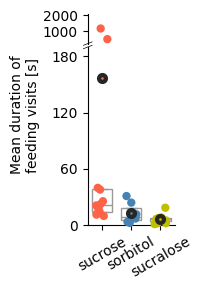

In [89]:
f,axes = plt.subplots(2,figsize=(2.12,3), height_ratios=(.5,3), sharex=True)
for i, ax in enumerate(axes):
    if i == 1:
        ax.set_ylim([0,190]) # 190
        stripWithBoxplot(ax, per_fly_df.loc[per_fly_df.condition.isin(['sucrose', 'sorbitol', 'sucralose'])], 'condition', 'mean_visit', cond_color, '', order=['sucrose', 'sorbitol', 'sucralose'], clip=True)
        ax.set_yticks(np.arange(0,181,60))
        ax.set_xticklabels(['sucrose', 'sorbitol', 'sucralose'], rotation=30, ha='center')
        ax.set_xlabel('')
        sns.despine(ax=ax, trim=False, bottom=False)
    else:
        ax.set_ylim([220,2100]) # 1880
        print(ax.get_ylim())
        stripWithBoxplot(ax, per_fly_df.loc[per_fly_df.condition.isin(['sucrose', 'sorbitol', 'sucralose'])], 'condition', 'mean_visit', cond_color, '', order=['sucrose', 'sorbitol', 'sucralose'], clip=True)
        ax.set_yticks(np.arange(1000,2001,1000))
        ax.xaxis.set_visible(False)
        sns.despine(ax=ax, trim=False, bottom=True)

d = .05  # how big to make the diagonal lines in axes coordinates
e = 1.15
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=axes[0].transAxes, lw=0.5, color='k', clip_on=False)
axes[0].plot((-d, +d), (-e*d, +e*d), **kwargs)        # top-left diagonal


d = .05  # how big to make the diagonal lines in axes coordinates
e = 0.19
kwargs.update(transform=axes[1].transAxes)  # switch to the bottom axes
axes[1].plot((-d, +d), (1 - e*d, 1 + e*d), **kwargs)  # bottom-left diagonal


f.supylabel('Mean duration of\nfeeding visits [s]', y=0.6, x=.2, ha='center', fontsize=10)
f.tight_layout(h_pad=0.0)
f.savefig(op.join(plotDir,f'mean_visit_{groupName}_broken_dataS1_fig8c.pdf'), dpi=300)

<a id='dataS1-fig-8d'></a>
### Data S1 Fig. 8D - Number of food visits

sorbitol vs sorbitol: pval = 1.000e+00
sorbitol vs sucralose: pval = 2.802e-01
sorbitol vs sucrose: pval = 2.507e-01
sucralose vs sucralose: pval = 1.000e+00
sucralose vs sucrose: pval = 8.904e-01
sucrose vs sucrose: pval = 1.000e+00


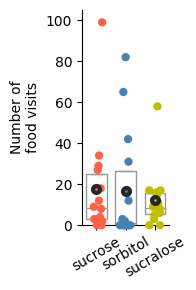

In [88]:
f,ax = plt.subplots(1,figsize=(1.96,3))
stripWithBoxplot(ax, per_fly_df.loc[per_fly_df.condition.isin(['sucrose', 'sorbitol', 'sucralose'])], 'condition', 'number_visit', cond_color, 'Number of\nfood visits', order=['sucrose', 'sorbitol', 'sucralose'])
ax.set_xlabel('')
ax.set_yticks(np.arange(0,101,20.))
ax.set_ylim([0,105])
sns.despine(ax=ax, trim=False, bottom=False)
f.tight_layout()
f.savefig(op.join(plotDir,f'number_visit_{groupName}_dataS1_fig8d.pdf'), dpi=300)

<a id='dataS1-fig-8e'></a>
### Data S1 Fig. 8E - Return ratios

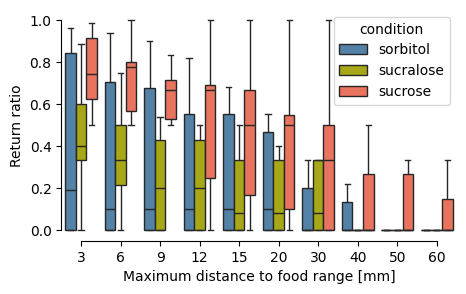

In [27]:
figwidth = 1.7*len(conditions)
fig, ax = plt.subplots(1,1, figsize=(figwidth,3))
groupvar = 'condition'
sns.boxplot(x='maxDistRange', y='returnratio', hue=groupvar, showfliers = False, palette=cond_color, data=distDf,ax=ax)
ax.set_ylabel('Return ratio')
ax.set_xlabel('Maximum distance to food range [mm]')
sns.despine(ax=ax, trim=True)
fig.savefig(op.join(plotDir, f'LoopAndDepartureStatsVsCumDist_{groupName}_dataS1_fig8e.pdf'), dpi=300)

<a id='dataS1-fig-8f'></a>
### Data S1 Fig. 8F - Turn bias

In [7]:
from src.makedataframe import makePerMoveSegementDF
slct_ethoStates = [1,2] #{0: 'border', 1: 'turn', 2: 'run', 3: 'feeding', 4: 'other'}
slct_cond = list(datDf.condition.unique())

datDf_filt = datDf.query(f'ethogram != {4} & condition in {slct_cond}')

# create per-move segment dataframe consisting only of runs and turns
perMoveSegDF = makePerMoveSegementDF(datDf_filt,ethoStatsOfInterest=slct_ethoStates)

# Augment per-segment dataframe with other properties
# radius of curvature of segments
perMoveSegDF['effArcRadius'] = perMoveSegDF['seg_length']/perMoveSegDF['absheadturnangle']

etho_state = [1]
querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & after_which_visit '
dfs = []
titles = ['before food', 'after food']
queries = ['== 0', '> 0']

for each, title in zip(queries, titles):
    perMoveSegDF_filt = perMoveSegDF.query(querystring+f'{each}')
    perMoveSegDF_filt2 = perMoveSegDF.query(querystring+f'{each}')
    perMoveSegDF_filt = perMoveSegDF_filt.groupby(['genotype','condition','fly'])['ifCW'].mean().reset_index()
    perMoveSegDF_filt2 = perMoveSegDF_filt2.groupby(['genotype','condition','fly'])['ifCW'].count().reset_index()
    perMoveSegDF_filt = pd.merge(perMoveSegDF_filt,perMoveSegDF_filt2,on=['genotype','condition','fly'])
    perMoveSegDF_filt = perMoveSegDF_filt.rename(columns={"ifCW_x": "ifCW", "ifCW_y": "turnCount"})
    #rescale turn bias
    perMoveSegDF_filt['abs_turn_bias'] = np.abs(2*(perMoveSegDF_filt.ifCW.values-0.5))
    perMoveSegDF_filt['food'] = title
    #display(perMoveSegDF_filt)
    dfs.append(perMoveSegDF_filt.query('turnCount >= 3'))

df = pd.concat(dfs)

RanksumsResult(statistic=-1.2701705922171767, pvalue=0.2040238704744366)


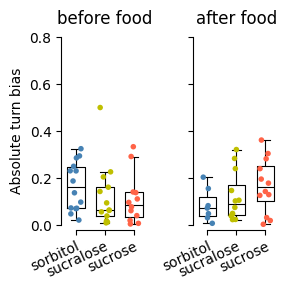

In [13]:
fig, axs = plt.subplots(1,len(titles),figsize=(len(titles)*1.5,3), sharey=True)
y = 'abs_turn_bias'

for title,ax in zip(titles, axs):
    plotdf= df.query(f'food == "{title}"')
    sns.stripplot(plotdf, x='condition', y=y, hue='condition',palette=cond_color, ax=ax, size=4, jitter=.2)
    sns.boxplot(plotdf, x='condition', y=y, dodge=False, legend=False,fill=False, fliersize=0, width=0.6, ax=ax)
    #axs.set_xticks(range(len(conditions)))
    #absTurnBiasMedians = tmp.groupby(['genotype','condition'])[[y]].median().reset_index()
    
    plt.setp(ax.lines, color='k',linewidth=0.8)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks(np.arange(len(plotdf.condition.unique())))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 25, ha='right', rotation_mode='anchor');
    ax.set_ylabel('Absolute turn bias')
    ax.set_ylim(-0.02,0.82)
    ax.set_yticks(np.arange(0,0.81,0.2))
    sns.despine(trim=True, ax=ax)
    ax.legend('',frameon=False)


sucrose_data = df.query('condition == "sucrose"')
a,b = sucrose_data.query('food == "before food"')[y], sucrose_data.query('food == "after food"')[y]
from scipy.stats import ranksums
print(ranksums(a,b))

fig.tight_layout()
plt.show()
fig.savefig(op.join(plotDir,f'absturnBias_perfly_{groupName}_dataS1_fig8f.pdf'), dpi=300)

<a id='dataS1-fig-9'></a>
## Data S1 Fig. 9 - Nutritive and taste cues contribute to eliciting and sustaining search

<a id='dataS1-fig-9a'></a>
### Data S1 Fig. 9A - Cumulative feeding

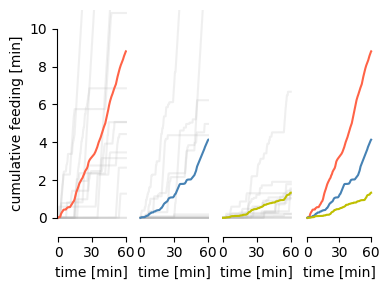

In [40]:
f,axes = plt.subplots(1,4,figsize=(4,3), sharey=True)

conditions = ['sucrose', 'sorbitol', 'sucralose',]
for i,(ax,cond) in enumerate(zip(axes.flat, conditions)):
    rdf = datDf.loc[datDf.condition==cond].copy()
    all_trace = np.zeros((108100,14))
    for j,fly in enumerate(rdf.fly.unique()):
        flydf = rdf.loc[rdf.fly==fly]
        dt = flydf.dt.values
        time = flydf.time.values / 60. ## mins
        etho = flydf.ethogram.values
        segm = flydf.segment.values

        # feeding mask
        feeding = (segm==1) 
        # cumulative feeding
        cumul_feeding = np.cumsum(dt*feeding)/60.
        # normalized feeding
        if cumul_feeding[-1] == 0:
            norm_cumul_feeding = cumul_feeding
        else:
            norm_cumul_feeding = np.cumsum(dt*feeding)/np.sum(dt*feeding)
        ax.plot(time, cumul_feeding, color="#b2b2b2", alpha=.2)
        all_trace[:,j] = cumul_feeding
    ax.plot(time, np.nanmean(all_trace, axis=1), color=cond_color[cond]) 
    axes[-1].plot(time, np.nanmean(all_trace, axis=1), color=cond_color[cond]) 
    ax.set_xlim([-1,61])
    ax.set_xticks(np.arange(0,61,30))
    ax.set_ylim([-1,11])
    ax.set_xlabel('time [min]')
    if i == 0:
        ax.set_ylabel('cumulative feeding [min]')
        sns.despine(ax=ax, trim=True)
    else:
        ax.get_yaxis().set_visible(False)
        sns.despine(ax=ax, trim=True, left=True)
axes[-1].set_xlabel('time [min]')
axes[-1].set_xticks(np.arange(0,61,30))    
axes[-1].get_yaxis().set_visible(False)
sns.despine(ax=axes[-1], trim=True, left=True)
f.tight_layout(w_pad=0.1)
plt.show()
outfile = op.join(plotDir,'cumulatives_dataS1_fig9a.pdf')
f.savefig(outfile, dpi=300)

<a id='dataS1-fig-9b'></a>
### Data S1 Fig. 9B - Cumulative looping

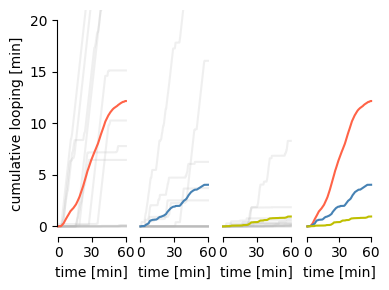

In [43]:
f,axes = plt.subplots(1,4,figsize=(4,3), sharey=True)

conditions = ['sucrose', 'sorbitol', 'sucralose',]
for i,(ax,cond) in enumerate(zip(axes.flat, conditions)):
    rdf = datDf.loc[datDf.condition==cond].copy()
    all_trace = np.zeros((108100,14))
    for j,fly in enumerate(rdf.fly.unique()):
        flydf = rdf.loc[rdf.fly==fly]
        dt = flydf.dt.values
        time = flydf.time.values / 60. ## mins
        etho = flydf.ethogram.values
        segm = flydf.segment.values

        # looping mask
        feeding = (segm==2) 
        # cumulative feeding
        cumul_feeding = np.cumsum(dt*feeding)/60.
        # normalized feeding
        if cumul_feeding[-1] == 0:
            norm_cumul_feeding = cumul_feeding
        else:
            norm_cumul_feeding = np.cumsum(dt*feeding)/np.sum(dt*feeding)
        ax.plot(time, cumul_feeding, color="#b2b2b2", alpha=.2)
        all_trace[:,j] = cumul_feeding
    ax.plot(time, np.nanmean(all_trace, axis=1), color=cond_color[cond]) 
    axes[-1].plot(time, np.nanmean(all_trace, axis=1), color=cond_color[cond]) 
    ax.set_xlim([-1,61])
    ax.set_xticks(np.arange(0,61,30))
    ax.set_ylim([-1,21])
    ax.set_xlabel('time [min]')
    if i == 0:
        ax.set_ylabel('cumulative looping [min]')
        sns.despine(ax=ax, trim=True)
    else:
        ax.get_yaxis().set_visible(False)
        sns.despine(ax=ax, trim=True, left=True)
axes[-1].set_xlabel('time [min]')
axes[-1].set_xticks(np.arange(0,61,30))    
axes[-1].get_yaxis().set_visible(False)
sns.despine(ax=axes[-1], trim=True, left=True)
f.tight_layout(w_pad=0.1)
plt.show()
outfile = op.join(plotDir,'cumulatives_dataS1_fig9b.pdf')
f.savefig(outfile, dpi=300)

<a id='dataS1-fig-9c'></a>
### Data S1 Fig. 9C - Segment dynamics

cam06_2023-03-30T15_44_19_head_roi0 STRANGE: 0.0 2.0 [1 2 1 2 1 2 1 4 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0
 5 0 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 4 0]
cam06_2023-03-30T15_44_19_head_roi0 [ 0 -1  0 -1]


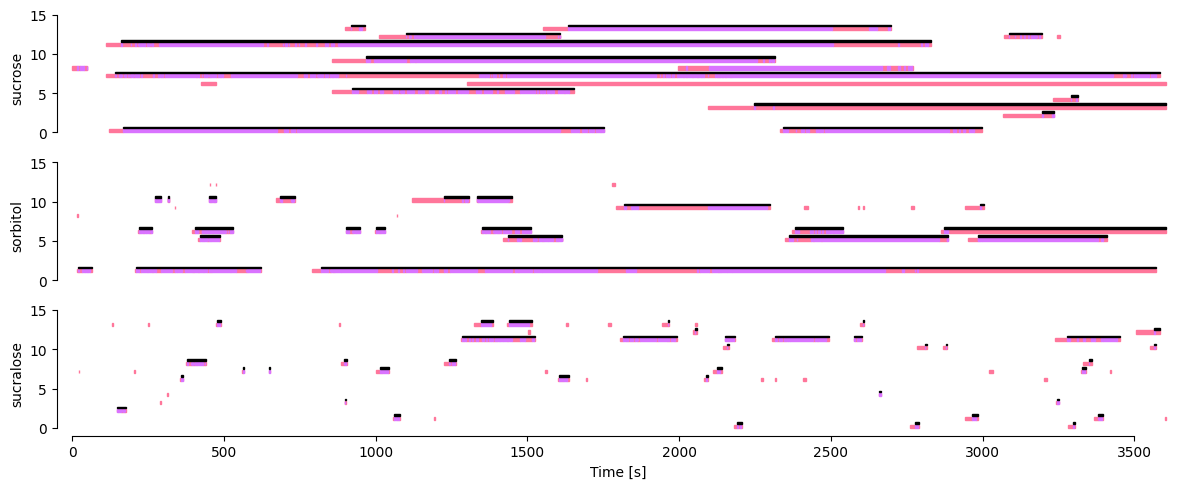

In [44]:
f,axes = plt.subplots(3,figsize=(12,5), sharex=True)

seg_color={0:'grey',1:'#FF769A', 2: '#d973ff',  3:'dodgerblue',
           4:'tan',5:'black'}

axes[-1].set_xlabel('Time [s]')
conditions = ['sucrose', 'sorbitol', 'sucralose',]
for i,(ax,cond) in enumerate(zip(axes, conditions)):
    ax.set_ylabel(f'{cond}')
    rdf = datDf.loc[datDf.condition==cond]
    
    for j,fly in enumerate(rdf.fly.unique()):
        flydf = rdf.loc[rdf.fly==fly]
        time = flydf.time.values
        dt = flydf.dt.values
        segment = flydf.segment.values
        rlen,pos,state = rle(segment)

        # search mask vector (search := consecutive alternating visit and loop segments after a visit with excluding the final segment)
        search_mask = np.zeros(segment.shape) #(segment==1)|(segment==2)    
        for p,rl in zip(pos[state==1],rlen[state==1]):
            if p+rl < len(segment):
                if segment[p-1] == 3 and segment[p+rl] != 4:
                    search_mask[p+rl] = 1
                elif segment[p-1] != 3 and segment[p+rl] == 4:
                    search_mask[p+rl] = -1
                elif segment[p-1] == 2 and segment[p+rl] == 2:
                    pass
                elif segment[p-1] == 0 and segment[p+rl] == 4:
                    pass
                elif segment[p-1] == 3 and segment[p+rl] == 4:
                    pass
                else:
                    print(fly, 'STRANGE:', segment[p-1], segment[p+rl], state)
        search_mask = np.cumsum(search_mask)

        # run length encoding of segments vector
        rlen_se, pos_se, st_se, dur_se = rle(search_mask, dt=dt)
        if np.sum(st_se)<0.:
            print(fly, st_se)
        for p,rl in zip(pos_se[st_se==1], rlen_se[st_se==1]):
                if p+rl == len(time):
                    rect = plt.Rectangle(xy=(time[p],j+0.5), width=time[p+rl-1]-time[p], height=.2, color='k',zorder=10)
                else:
                    rect = plt.Rectangle(xy=(time[p],j+0.5), width=time[p+rl]-time[p], height=.2, color='k',zorder=10)
                ax.add_artist(rect)
        for ss in range(1,3):
            for p,rl in zip(pos[state==ss], rlen[state==ss]):
                if p+rl == len(time):
                    rect = plt.Rectangle(xy=(time[p],j), width=time[p+rl-1]-time[p], height=.4, color=seg_color[ss])
                else:
                    rect = plt.Rectangle(xy=(time[p],j), width=time[p+rl]-time[p], height=.4, color=seg_color[ss])
                ax.add_artist(rect)
    ax.set_xlim([-50,3650])
    ax.set_ylim([-1,15])
    if i == len(axes)-1:
        sns.despine(ax=ax, trim=True)
    else:
        ax.get_xaxis().set_visible(False)
        sns.despine(ax=ax, trim=True, bottom=False)
        ax.spines['bottom'].set_visible(False)
f.tight_layout()
outfile = op.join(plotDir,'segmentgram.pdf')
f.savefig(outfile, dpi=300)

<a id='dataS1-fig-9d'></a>
### Data S1 Fig. 9D - Search bout duration

sorbitol vs sorbitol: pval = 1.000e+00
sorbitol vs sucralose: pval = 3.121e-01
sorbitol vs sucrose: pval = 2.907e-02
sucralose vs sucralose: pval = 1.000e+00
sucralose vs sucrose: pval = 5.958e-02
sucrose vs sucrose: pval = 1.000e+00


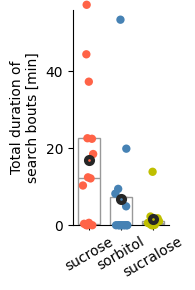

In [36]:
per_fly_df['total_search_min'] = per_fly_df['total_search']/60. ## in minutes

f,ax = plt.subplots(1,figsize=(1.96,3))
stripWithBoxplot(ax, per_fly_df.loc[per_fly_df.condition.isin(['sucrose', 'sorbitol', 'sucralose'])], 'condition', 'total_search_min', cond_color, 'Total duration of\nsearch bouts [min]', order=['sucrose', 'sorbitol', 'sucralose'])
ax.set_xlabel('')
ax.set_yticks(np.arange(0,50,20.))
ax.set_ylim([0,56])
sns.despine(ax=ax, trim=False, bottom=False)
f.tight_layout()
f.savefig(op.join(plotDir,f'total_search_{groupName}_dataS1_fig9d.pdf'), dpi=300)

<a id='dataS1-fig-9e'></a>
### Data S1 Fig. 9E - Search bout distance

sorbitol vs sorbitol: pval = 1.000e+00
sorbitol vs sucralose: pval = 3.346e-01
sorbitol vs sucrose: pval = 4.484e-01
sucralose vs sucralose: pval = 1.000e+00
sucralose vs sucrose: pval = 6.133e-01
sucrose vs sucrose: pval = 1.000e+00


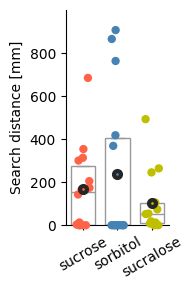

In [38]:
f,ax = plt.subplots(1,figsize=(1.96,3))
stripWithBoxplot(ax, per_fly_df.loc[per_fly_df.condition.isin(['sucrose', 'sorbitol', 'sucralose'])], 'condition', 'distance_search', cond_color, 'Search distance [mm]', order=['sucrose', 'sorbitol', 'sucralose'])
ax.set_xlabel('')
ax.set_yticks(np.arange(0,850,200.))
ax.set_ylim([0,1000])
sns.despine(ax=ax, trim=False, bottom=False)
f.tight_layout()
f.savefig(op.join(plotDir,f'distance_search_{groupName}_dataS1_fig9e.pdf'), dpi=300)

<a id='dataS1-fig-9f'></a>
### Data S1 Fig. 9F - Regression plot

['sorbitol' 'sucralose' 'sucrose']


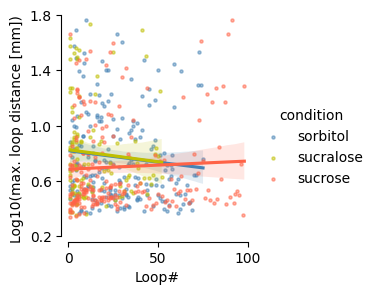

In [14]:
numFeedBins = 10
myDistBins = [0,3,6,9,12,15,20,30,40,50,60]
myDistBins_even = list(np.arange(0,61,4))
loopBins = list(np.arange(1,52,4)) #list(np.arange(1,20,2)) + list(np.arange(20,50,5)) + list(np.arange(50,100,10))
loopBinsShort = list(np.arange(1,32,3)) #list(np.arange(1,20,2)) + list(np.arange(20,35,5)) #+ list(np.arange(50,100,10))
cffBins = np.linspace(-0.1,1,12)

with np.errstate(divide='ignore'):
    loopDf, loopDepDf = makeLoopDf(datDf)
loopDf['feedingBin'] = pd.cut(loopDf["normFed"],numFeedBins)

loopLenStats = pd.DataFrame(loopDf.groupby(['condition','flyid','loopN']).max()[['loop_length','distance_patch_0','fed','normFed', 'deltaCFF']].to_records())
loopLenStats['pathLengthDistanceRatio'] = loopLenStats.loop_length/loopLenStats.distance_patch_0
loopLenStats['maxDistBin_uneven'] = pd.cut(loopLenStats["distance_patch_0"],bins=myDistBins, precision=1, right=False)
loopLenStats['maxDistBin'] = pd.cut(loopLenStats["distance_patch_0"],bins=myDistBins_even, precision=1, right=False)
loopLenStats['deltaCFFBin'] = pd.cut(loopLenStats["deltaCFF"],bins=cffBins, precision=3,right=False)
loopLenStats['loopN_bin'] = pd.cut(loopLenStats["loopN"],bins=loopBins, precision=1,right=False)
loopLenStats['loopN_binShort'] = pd.cut(loopLenStats["loopN"],bins=loopBinsShort, precision=1,right=False)
loopLenStats['loopN_binShort_num'] = pd.cut(loopLenStats["loopN"],bins=loopBinsShort, precision=1, labels=False,right=False)
loopLenStats.head()
loopLenStats.to_csv(op.join(plotDir, f'per_loop_{groupName}.csv'))

plotdata = loopLenStats.copy()
plotdata['combined_x'] = plotdata.normFed * plotdata.loopN/np.amax(plotdata.loopN)
plotdata['log_dist'] = np.log10(plotdata.distance_patch_0)
#plotdata.query('condition == "Gr5a-40hr" and flyid == "fly17"')
print(plotdata.condition.unique())

### regression plot
sns.lmplot(data=plotdata, x='loopN', y='log_dist', hue='condition', scatter_kws=dict(s=5, alpha=0.5), palette=cond_color, height=3, aspect=1)
plt.xlabel('Loop#')
plt.ylabel('Log10(max. loop distance [mm])')
plt.ylim([0.16,1.8])
plt.yticks(np.arange(0.2,1.9,0.4))
sns.despine(trim=True)
plt.savefig(op.join(plotDir, 'nutrient_regr_dataS1_fig9f.pdf'), dpi=300)
#, x_bins=np.arange(1, maxbin, 3), x_estimator=np.mean, n_boot=10000,
#    ci=99, markers= 'x', fit_reg=True, legend=False, height=1.5*1.59, aspect=1.1)

<a id='dataS1-fig-10'></a>
## Data S1 Fig. 10 - Exploitative parameters of searches elicited by agarose with sucrose versus agarose only

In [4]:
### loading per-frame data
groupName = 'agarose'
groups = {
    'agarose': ['JR_CantonSMH_single_dark_5ul_perframe_0-125M_24hr',
        'JR_CantonSMH_single_dark_5ul_perframe_0-125M_40hr',
        'JR_CantonSMH_single_dark_5ul_perframe_0M_24hr',
        'JR_CantonSMH_single_dark_5ul_perframe_0M_40hr'],
    }
plotDir = op.join('plt', groupName)
os.makedirs(plotDir, exist_ok=True)

files = groups[groupName]
datDf, metadata = getDataPerGroup_new(rootDir, files) 
conditions = list(datDf.condition.unique())
genotypes = list(datDf.genotype.unique())
flyids = list(datDf.flyid.unique())

for cond in conditions:
    n=len(list(set(datDf.query(f'condition=="{cond}"').fly.values)))
    print(f'{cond}, n={n}')

display(datDf.head())
display(datDf.shape)

### per-fly data
per_fly_df = get_fly_df(datDf, metadata)

  0%|          | 0/4 [00:00<?, ?it/s]

0-125M_24hr, n=28
0-125M_40hr, n=29
0M_24hr, n=26
0M_40hr, n=25


,fly,condition,genotype,frame,dt,time,body_x,body_y,head_x,head_y,...,arenaRad,food_x,food_y,food_r,distance_patch_0,flyid,is_feeding,fed,cff,isnan
0,bias_video_cam_0_date_2019_06_05_time_18_12_19...,0-125M_24hr,CantonSMH,0,0.041694,0.000000,-72.669417,24.829201,-71.222151,24.929334,...,83.215092,0.0,-0.0,1.660377,76.794098,fly01,0,0.0,0.0,False
1,bias_video_cam_0_date_2019_06_05_time_18_12_19...,0-125M_24hr,CantonSMH,1,0.041694,0.041694,-72.669417,24.829201,-71.222151,24.929334,...,83.215092,0.0,-0.0,1.660377,76.794098,fly01,0,0.0,0.0,False
2,bias_video_cam_0_date_2019_06_05_time_18_12_19...,0-125M_24hr,CantonSMH,2,0.041694,0.083388,-72.669417,24.829201,-71.222151,24.929334,...,83.215092,0.0,-0.0,1.660377,76.794098,fly01,0,0.0,0.0,False
3,bias_video_cam_0_date_2019_06_05_time_18_12_19...,0-125M_24hr,CantonSMH,3,0.041694,0.125082,-72.669417,24.829201,-71.222151,24.929334,...,83.215092,0.0,-0.0,1.660377,76.794098,fly01,0,0.0,0.0,False
4,bias_video_cam_0_date_2019_06_05_time_18_12_19...,0-125M_24hr,CantonSMH,4,0.041694,0.166776,-72.669417,24.829201,-71.222151,24.929334,...,83.215092,0.0,-0.0,1.660377,76.794098,fly01,0,0.0,0.0,False


(6913517, 34)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

### Return ratio analysis

In [5]:
numFeedBins = 10
myDistBins = [0,3,6,9,12,15,20,30,40,50,60]
myDistBins_even = list(np.arange(0,61,4))
myDistBins_farClose = [0,20,60]
loopBins = list(np.arange(1,52,4))
loopBinsShort = list(np.arange(1,32,3))
cffBins = np.linspace(-0.1,1,12)

loopdepStats = pd.DataFrame()
pbar = tqdm(conditions)
for condition in pbar:
    pbar.set_description(f"Processing {condition}")
    loopdepStats_tmp = makeLoopDepartureStatsDf(datDf.query(f'condition=="{condition}"'))
    loopdepStats_tmp['condition'] = condition
    loopdepStats = pd.concat([loopdepStats,loopdepStats_tmp])

loopdepStats['feedingBin'] = pd.cut(loopdepStats["normFed"],numFeedBins, precision=0,right=False)
loopdepStats['maxDistBin'] = pd.cut(loopdepStats["maxDist"],bins=myDistBins_even, precision=1,right=False)
loopdepStats['maxDistBin_uneven'] = pd.cut(loopdepStats["maxDist"],bins=myDistBins, precision=1,right=False)
loopdepStats['maxDistBin_farClose'] = pd.cut(loopdepStats["maxDist"],bins=myDistBins_farClose, precision=1,right=False)
loopdepStats.head()

  0%|          | 0/4 [00:00<?, ?it/s]

,condition,fly,flyid,segment,ethogram,distance_patch_0,displacement,dt,is_feeding,fed,...,changeSeg,segID,cumpathlength,maxDist,pathLength,pathLengthDistanceRatio,feedingBin,maxDistBin,maxDistBin_uneven,maxDistBin_farClose
0,0-125M_24hr,bias_video_cam_0_date_2019_06_05_time_18_12_19...,fly01,2.0,2.0,0.845009,0.090198,0.041693,0,457.464296,...,1,1,0.090198,2.493245,8.433359,3.382483,"[0.4, 0.5)","[0, 4)","[0, 3)","[0, 20)"
1,0-125M_24hr,bias_video_cam_0_date_2019_06_05_time_18_12_19...,fly01,2.0,1.0,1.257481,0.157248,0.041694,0,625.365226,...,1,2,0.157248,5.287020,18.983103,3.590511,"[0.6, 0.7)","[4, 8)","[3, 6)","[0, 20)"
2,0-125M_24hr,bias_video_cam_0_date_2019_06_05_time_18_12_19...,fly01,2.0,1.0,1.112732,0.299969,0.041694,0,629.534605,...,1,3,0.299969,4.707908,8.775373,1.863964,"[0.6, 0.7)","[4, 8)","[3, 6)","[0, 20)"
3,0-125M_24hr,bias_video_cam_0_date_2019_06_05_time_18_12_19...,fly01,2.0,1.0,1.224498,0.173569,0.041694,0,641.459031,...,1,4,0.173569,7.340134,29.348879,3.998412,"[0.6, 0.7)","[4, 8)","[6, 9)","[0, 20)"
4,0-125M_24hr,bias_video_cam_0_date_2019_06_05_time_18_12_19...,fly01,2.0,1.0,1.236879,0.150972,0.041694,0,654.217336,...,1,5,0.150972,2.923535,6.129625,2.096648,"[0.6, 0.7)","[0, 4)","[0, 3)","[0, 20)"


In [6]:
distDf = pd.DataFrame(columns = ['condition','flyid','maxDistRange','loopCount','returnratio'])
pbar = tqdm(conditions)
for condition in pbar:
    pbar.set_description(f"Processing {condition}")
    conddf = loopdepStats.query(f'condition == "{condition}"')
    flies = list(conddf.flyid.unique())
    for fly in flies:
        for r in myDistBins[1:]: #[1:]
            flydf = conddf.query(f'segment == 2 & maxDist >= {r} & flyid =="{fly}"')
            #print(f'segment == 2 & maxDist >= {r} & flyid =="{fly}"')
            if len(flydf) == 0:
                tmp = pd.DataFrame.from_dict({'condition': [condition], 'flyid':[fly], 'loopCount':[0]})
            else:
                tmp = pd.DataFrame(flydf.groupby(['condition','flyid']).count().to_records())[['condition','flyid','maxDist']].rename(columns={'maxDist':'loopCount'})
            tmp['maxDistRange'] = r
            
            flydf = conddf.query('segment == 4 & maxDist >= {} & flyid =="{}"'.format(r, fly))
            if len(flydf) == 0:
                tmp2 = pd.DataFrame.from_dict({'condition': [condition], 'flyid':[fly], 'nDepartures':[0]})
            else:
                tmp2 = pd.DataFrame(flydf.groupby(['condition','flyid']).count().to_records())[['condition','flyid','maxDist']]
            tmp = (pd.merge(tmp, tmp2, on=['condition','flyid'])).rename(columns={'maxDist':'nDepartures'})
            tmp['allsegs'] = tmp.nDepartures + tmp.loopCount
            tmp = tmp[(tmp.allsegs > 0)]
            tmp['returnratio'] = tmp.loopCount.values/(tmp.loopCount.values + tmp.nDepartures.values)
            distDf = pd.concat([distDf,tmp])

  0%|          | 0/4 [00:00<?, ?it/s]

/var/folders/_1/9_lwjkgx0cxdt5ckms78hbdm0000gr/T/ipykernel_2413/1715985024.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  distDf = pd.concat([distDf,tmp])


<a id='dataS1-fig-10a'></a>
### Data S1 Fig. 10A - Total duration of visits

pval = 1.291e-07


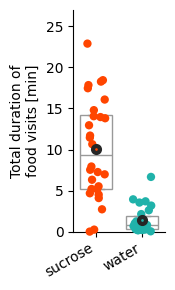

In [46]:
f,ax = plt.subplots(1,figsize=(1.85,3))
per_fly_df['total_visit_min'] = per_fly_df['total_visit']/60. ## in minutes
order=['0-125M_24hr', '0M_24hr']
labels=['sucrose', 'water']
stripWithBoxplot(ax, per_fly_df.loc[per_fly_df.condition.str.contains('24hr')], 'condition', 'total_visit_min', cond_color, 'Total duration of\nfood visits [min]', order=order)
ax.set_xticklabels(labels, rotation=30, ha='right')
ax.set_xlabel('')
ax.set_ylim([0,27])
sns.despine(ax=ax, trim=False, bottom=False)
f.tight_layout()
filename = f'total_visit_{groupName}.pdf'
f.savefig(op.join(plotDir, filename), dpi=300)

<a id='dataS1-fig-10b'></a>
### Data S1 Fig. 10B - Scatter plot

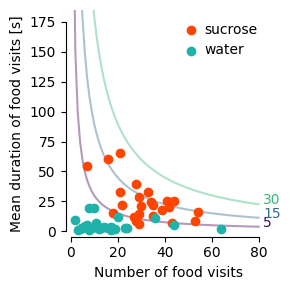

In [52]:
cmap = plt.get_cmap('viridis')
f,ax = plt.subplots(1,figsize=(2*1.5,3))

order = order=['0-125M_24hr', '0M_24hr',]
labels=['sucrose', 'water']
for cond, label in zip(order,labels):
    x,y = per_fly_df.loc[per_fly_df.condition==cond,'number_visit'].values, per_fly_df.loc[per_fly_df.condition==cond,'mean_visit'].values
    ax.scatter(x,y, color=cond_color[cond], label=label)
    ax.set_ylim([-18.5/4,185])
    ax.set_xlim([-8.5/4,85])
ax.legend(frameon=False, handletextpad=0.)
xs = np.arange(0.00001,81,1.)
totals = np.array([5,15,30])
ys = [total/xs for total in 60*totals]


for i,y in enumerate(ys):
    rgba = cmap(i/len(ys))
    ax.plot(xs, y, color=rgba, alpha=0.4, zorder=0)
    ax.text(82, y[-1], f'{totals[i]}', color=rgba)


ax.set_ylabel('Mean duration of food visits [s]')
ax.set_xlabel('Number of food visits')

sns.despine(ax=ax, trim=True)
f.tight_layout()
filename = f'scatter_{groupName}.pdf'
f.savefig(op.join(plotDir, filename), dpi=300)

<a id='dataS1-fig-10c'></a>
### Data S1 Fig. 10C - Mean duration of visits

pval = 1.391e-07


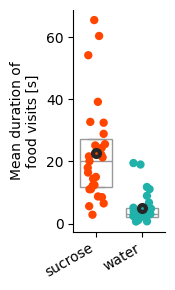

In [48]:
f,ax = plt.subplots(1,figsize=(1.85,3))
order=['0-125M_24hr', '0M_24hr']
labels=['sucrose', 'water']
stripWithBoxplot(ax, per_fly_df.loc[per_fly_df.condition.str.contains('24hr')], 'condition', 'mean_visit', cond_color, 'Mean duration of\nfood visits [s]', order=order)
ax.set_xticklabels(labels, rotation=30, ha='right')
ax.set_xlabel('')
#ax.set_ylim([0,27])
sns.despine(ax=ax, trim=False, bottom=False)
f.tight_layout()
filename = f'mean_visit_{groupName}.pdf'
f.savefig(op.join(plotDir, filename), dpi=300)

<a id='dataS1-fig-10d'></a>
### Data S1 Fig. 10D - Number of visits

pval = 1.068e-03


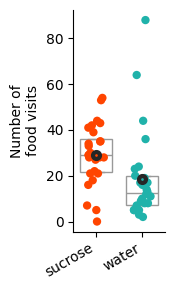

In [49]:
f,ax = plt.subplots(1,figsize=(1.85,3))
order = order=['0-125M_24hr', '0M_24hr']
labels=['sucrose', 'water']
stripWithBoxplot(ax, per_fly_df.loc[per_fly_df.condition.str.contains('24hr')], 'condition', 'number_visit', cond_color, 'Number of\nfood visits', order=order)
ax.set_xticklabels(labels, rotation=30, ha='right')
ax.set_xlabel('')
#ax.set_ylim([0,250])
sns.despine(ax=ax, trim=False, bottom=False)
f.tight_layout()
filename = f'number_visit_{groupName}.pdf'
f.savefig(op.join(plotDir, filename), dpi=300)

<a id='dataS1-fig-10e'></a>
### Data S1 Fig. 10E - Return ratios

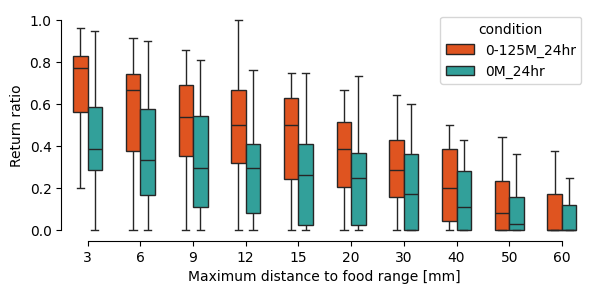

In [12]:
figwidth = 1.7*len(conditions)
fig, ax = plt.subplots(1,1, figsize=(figwidth,3))
groupvar = 'condition'
order = ['0-125M_24hr', '0M_24hr']
sns.boxplot(x='maxDistRange', y='returnratio', hue=groupvar, hue_order=order, showfliers = False, width=0.55, palette=cond_color, data=distDf,ax=ax)
ax.set_ylabel('Return ratio')
ax.set_xlabel('Maximum distance to food range [mm]')
sns.despine(ax=ax, trim=True)
fig.savefig(op.join(plotDir, f'LoopAndDepartureStatsVsCumDist_{groupName}_dataS1_fig10e.pdf'), dpi=300)

<a id='dataS1-fig-10f'></a>
### Data S1 Fig. 10F - Turn bias

In [21]:
from src.makedataframe import makePerMoveSegementDF
slct_ethoStates = [1,2] #{0: 'border', 1: 'turn', 2: 'run', 3: 'feeding', 4: 'other'}
slct_cond = list(datDf.condition.unique())

datDf_filt = datDf.query(f'ethogram != {4} & condition in {slct_cond}')

# create per-move segment dataframe consisting only of runs and turns
perMoveSegDF = makePerMoveSegementDF(datDf_filt,ethoStatsOfInterest=slct_ethoStates)

# Augment per-segment dataframe with other properties
# radius of curvature of segments
perMoveSegDF['effArcRadius'] = perMoveSegDF['seg_length']/perMoveSegDF['absheadturnangle']

etho_state = [1]
querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & after_which_visit '
dfs = []
titles = ['before food', 'after food']
queries = ['== 0', '>=1']

for each, title in zip(queries, titles):
    perMoveSegDF_filt = perMoveSegDF.query(querystring+f'{each}')
    perMoveSegDF_filt2 = perMoveSegDF.query(querystring+f'{each}')
    perMoveSegDF_filt = perMoveSegDF_filt.groupby(['genotype','condition','fly'])['ifCW'].mean().reset_index()
    perMoveSegDF_filt2 = perMoveSegDF_filt2.groupby(['genotype','condition','fly'])['ifCW'].count().reset_index()
    perMoveSegDF_filt = pd.merge(perMoveSegDF_filt,perMoveSegDF_filt2,on=['genotype','condition','fly'])
    perMoveSegDF_filt = perMoveSegDF_filt.rename(columns={"ifCW_x": "ifCW", "ifCW_y": "turnCount"})
    #rescale turn bias
    perMoveSegDF_filt['abs_turn_bias'] = np.abs(2*(perMoveSegDF_filt.ifCW.values-0.5))
    perMoveSegDF_filt['food'] = title
    #display(perMoveSegDF_filt)
    dfs.append(perMoveSegDF_filt.query('turnCount >= 3'))

df = pd.concat(dfs)
display(df)

,genotype,condition,fly,ifCW,turnCount,abs_turn_bias,food
0,CantonSMH,0-125M_24hr,fly01,0.545455,11,0.090909,before food
1,CantonSMH,0-125M_24hr,fly02,0.638132,257,0.276265,before food
2,CantonSMH,0-125M_24hr,fly03,0.688889,180,0.377778,before food
3,CantonSMH,0-125M_24hr,fly04,0.452055,438,0.09589,before food
4,CantonSMH,0-125M_24hr,fly05,0.483333,420,0.033333,before food
...,...,...,...,...,...,...,...
96,CantonSMH,0M_40hr,fly21,0.462025,790,0.075949,after food
97,CantonSMH,0M_40hr,fly22,0.482838,1311,0.034325,after food
98,CantonSMH,0M_40hr,fly23,0.538272,1620,0.076543,after food
99,CantonSMH,0M_40hr,fly24,0.519038,499,0.038076,after food


CantonSMH
seg_state in [2, 3, 4, 5] & etho_state == [1] & genotype == "CantonSMH" & after_which_visit ==0
CantonSMH
seg_state in [2, 3, 4, 5] & etho_state == [1] & genotype == "CantonSMH" & after_which_visit >=1


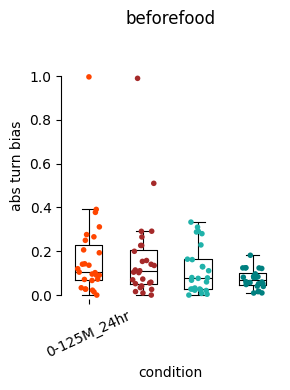

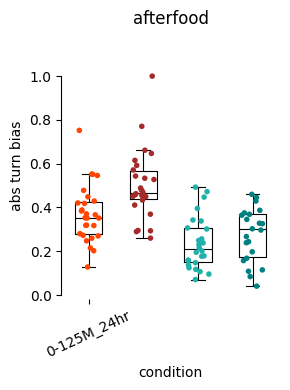

In [17]:
etho_state = [1] # turns

for i, visitTH in enumerate(['==0','>=1']): #  This is an upper bound: ==0 --> before finding food spot, >=1 --> after finding food.
    if visitTH == '==0': postfix = 'beforefood'
    else: postfix = 'afterfood'

    #itterate through genotypes to fetch correct data
    means_tmp = pd.DataFrame()
    counts_tmp = pd.DataFrame()
    for g, genotype in enumerate(genotypes):
        querystring = f'seg_state in {[2,3,4,5]} & etho_state == {etho_state} & genotype == "{genotype}"'
        querystring = querystring + f' & after_which_visit {visitTH}'
        if len(genotypes) > 1 :
            querystring = querystring + f'& condition == "{conditions[0]}"'
        print(genotype)
        print(querystring)
        means_tmp = pd.concat([means_tmp,perMoveSegDF.query(querystring)])
        counts_tmp = pd.concat([counts_tmp,perMoveSegDF.query(querystring)])
    
    keep_indices = ['genotype','condition','fly','after_which_visit']
    means = means_tmp.groupby(keep_indices)['ifCW'].mean().reset_index()
    counts = counts_tmp.groupby(keep_indices)['ifCW'].count().reset_index()
    perMoveSegDF_filt = pd.merge(means,counts,on=keep_indices)
    perMoveSegDF_filt = perMoveSegDF_filt.rename(columns={"ifCW_x": "ifCW", "ifCW_y": "turnCount"})
    #rescale turn bias
    perMoveSegDF_filt['ifCWplt'] = 2*(perMoveSegDF_filt.ifCW.values-0.5)
    perMoveSegDF_filt = perMoveSegDF_filt.query('turnCount >= 3')

    plotdf = perMoveSegDF_filt.copy()
    plotdf['abs_ifCW'] = np.abs(plotdf.ifCW.values -0.5)*2
    tmp = plotdf.groupby(['condition','fly'])['abs_ifCW'].mean().reset_index()
    absTurnBiasMedians = tmp.groupby(['condition'])[['abs_ifCW']].median().reset_index()
    plotdf.to_csv(op.join(plotDir, f'absturnBias_{postfix}.csv'), index=False)  

    fig, axs = plt.subplots(1,1,figsize=(3,4))
    tmp = plotdf.groupby(['condition','fly'])['abs_ifCW'].mean().reset_index()
    sns.stripplot(tmp, x='condition', y='abs_ifCW', hue='condition', palette=cond_color, ax=axs, size=4, jitter=.2)
    sns.boxplot(tmp, x='condition', y='abs_ifCW', dodge=False, legend=False,fill=False, fliersize=0, width=0.5)
    axs.set_xticks(range(len(plotdf['genotype'].unique()))) 
    plt.setp(axs.lines, color='k',linewidth=0.8)
    axs.set_xticklabels(axs.get_xticklabels(),rotation = 25);
    axs.set_ylabel('abs turn bias')
    axs.set_ylim(-0.02,1.2)
    sns.despine(trim=True)
    axs.legend('',frameon=False)
    axs.set_title(postfix)
    fig.tight_layout()
    #fig.savefig(plotDir+sep+'absturnBias_perfly_'+postfix+'.pdf')

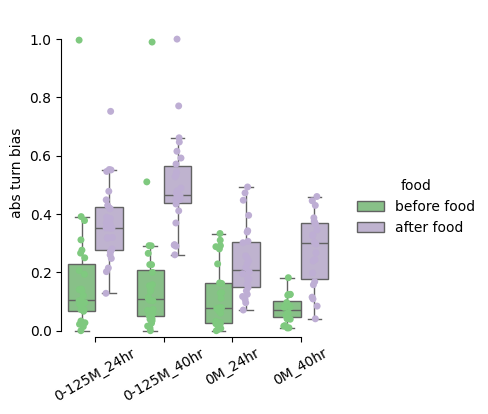

In [27]:
# compare turn bias before and after food
try: plotdf_pre = pd.read_csv(op.join(plotDir, 'absturnBias_beforefood.csv'))
except: print('precalculate turn bias for before and after food encounter')
try: plotdf_post = pd.read_csv(op.join(plotDir, 'absturnBias_afterfood.csv'))
except: print('precalculate turn bias for before and after food encounter')

plotdf_pre['food'] = 'before food'
plotdf_post['food'] = 'after food'
plotdf_all = pd.concat([plotdf_pre, plotdf_post])

plotdf_all.to_csv(op.join(plotDir,'absturnBias_panel_forStatistic.csv'), index=False)  
tmp = plotdf_all.groupby(['genotype','condition','fly','food'])['abs_ifCW'].mean().reset_index()
g = sns.catplot(
    data=tmp, x="condition", y="abs_ifCW", hue="food",
    kind="box", dodge=True, fliersize=0, aspect=.9, height=4, palette='Accent', hue_order=['before food','after food']
)
g.map_dataframe(sns.stripplot, x="condition", y="abs_ifCW", 
            hue="food", dodge=True, palette='Accent', hue_order=['before food','after food'])
g.set_axis_labels("", 'abs turn bias')
g.set_xticklabels(rotation=30)
g.set(ylim=(-0.02,1.1))
g.despine(trim=True)
g.savefig(op.join(plotDir, 'absturnBias_perfly_before-afterfood.pdf'), dpi=300)

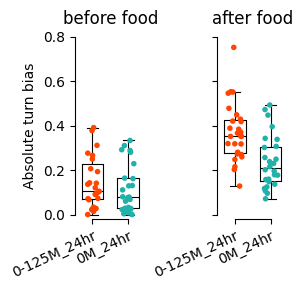

In [35]:
fig, axs = plt.subplots(1,len(titles),figsize=(len(titles)*1.5,3), sharey=True)

for title,ax in zip(titles, axs):
    plotdf= plotdf_all.copy()
    tmp = plotdf_all.groupby(['genotype','condition','fly','food'])['abs_ifCW'].mean().reset_index()
    tmp = tmp.loc[tmp.condition.str.contains('24h')].query(f'food == "{title}"')
    
    sns.stripplot(tmp, x='condition', y=y, hue='condition',palette=cond_color, ax=ax, size=4, jitter=.2)
    sns.boxplot(tmp, x='condition', y=y, dodge=False, legend=False,fill=False, fliersize=0, width=0.6, ax=ax)
    #axs.set_xticks(range(len(conditions)))
    #absTurnBiasMedians = tmp.groupby(['genotype','condition'])[[y]].median().reset_index()
    
    plt.setp(ax.lines, color='k',linewidth=0.8)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks(np.arange(len(tmp.condition.unique())))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 25, ha='right', rotation_mode='anchor');
    ax.set_ylabel('Absolute turn bias')
    ax.set_ylim(-0.02,0.82)
    ax.set_yticks(np.arange(0,0.81,0.2))
    sns.despine(trim=True, ax=ax)
    ax.legend('',frameon=False)


#sucrose_data = df.query('condition == "sucrose"')
#a,b = sucrose_data.query('food == "before food"')[y], sucrose_data.query('food == "after food"')[y]
#from scipy.stats import ranksums
#print(ranksums(a,b))

fig.tight_layout()
plt.show()
fig.savefig(op.join(plotDir,f'absturnBias_perfly_{groupName}_dataS1_fig10f.pdf'), dpi=300)

In [31]:
tmp

,genotype,condition,fly,food,abs_ifCW
0,CantonSMH,0-125M_24hr,fly01,after food,0.351677
1,CantonSMH,0-125M_24hr,fly01,before food,0.090909
2,CantonSMH,0-125M_24hr,fly02,after food,0.352829
3,CantonSMH,0-125M_24hr,fly02,before food,0.276265
4,CantonSMH,0-125M_24hr,fly03,after food,0.366549
...,...,...,...,...,...
201,CantonSMH,0M_40hr,fly23,before food,0.051546
202,CantonSMH,0M_40hr,fly24,after food,0.296985
203,CantonSMH,0M_40hr,fly24,before food,0.059633
204,CantonSMH,0M_40hr,fly25,after food,0.243660
